In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
def extract_paras_columns(excel_filename,sheet_name,file_root="F:\\YIELD\\youdaOptronics\\Archive(2)",csv_generate_flag=False):
    rawData=pd.read_excel(os.path.join(file_root,excel_filename),sheet_name=sheet_name)
    columns_list=list(rawData.columns)
    para_columns_list=[]
    for column in columns_list:
        if 'TIME' not in column:
            para_columns_list.append(column)
    df_para=rawData[para_columns_list].copy()
    df_para['label']=0
    df_para['label'][df_para['Y']>0]=1
#     print(df_para.info())
    if(csv_generate_flag):
        df_M3_CLA_para.to_csv(os.path.join(file_root,"data_generate",excel_filename[:-5]+"_paras.csv"),index=False)
    return df_para

def count_ratio_every_col(df_raw:pd.DataFrame):
    new_col=[]
    total=df_raw.shape[0]
    for _ in df_raw.columns:
        if (df_raw[_].dtype!=np.int64)&(df_raw[_].dtype!=np.float64):
#             print(_,df_raw[_].dtype)
            continue
        a=pd.value_counts(df_raw[_])
        df_=a/total
#         print(_,max(df_))
        if (max(df_)<0.95):
            new_col.append(_)
    new_col.remove('label')
    new_col.remove('Y')
    return new_col

def analysis_ratio_every_col(df_raw:pd.DataFrame):
    total=df_raw.shape[0]
    col_list=[]
    max_ratio_list=[]
    max_ratio_stuff_list=[]
    for _ in df_raw.columns:
        if (df_raw[_].dtype!=np.int64)&(df_raw[_].dtype!=np.float64):
            print(_,df_raw[_].dtype)
            continue
        a=pd.value_counts(df_raw[_])
        df_=a/total
        col_list.append(_)
        max_ratio_list.append(max(df_))
        max_ratio_stuff_list.append(a.index[0])
        print(_,max(df_),a.index[0])
    df_report=pd.DataFrame({"col":col_list,"max_ratio":max_ratio_list,"max_ratio_stuff":max_ratio_stuff_list})
    return df_report


In [15]:
df_M3_CLA=extract_paras_columns("M3-CLA.xlsx",'1_1')
df_M3_CLA=df_M3_CLA.fillna(-1)

df_M3_STO=extract_paras_columns("M3-STO.xlsx",'1_1')
df_M3_STO=df_M3_STO.fillna(-1)

df_BP2_ICP=extract_paras_columns("BP2-ICP.xlsx",'1_1')
df_BP2_ICP=df_BP2_ICP.fillna(-1)

df_ITO2_IEX_KPC=extract_paras_columns("ITO2-IEX.xlsx",'KPC')
df_ITO2_IEX_KPC=df_ITO2_IEX_KPC.fillna(-1)
df_ITO2_IEX_RS=extract_paras_columns("ITO2-IEX.xlsx",'RS')
df_ITO2_IEX_RS=df_ITO2_IEX_RS.fillna(-1)
df_ITO2_IEX_RS.drop(columns=['Y','label'],inplace=True)
df_ITO2_IEX=pd.merge(df_ITO2_IEX_RS,df_ITO2_IEX_KPC,on='SHEET_ID',how='inner')
# df_ITO2_IEX.info()


E:\anaconda\install\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [16]:
col_M3_CLA=count_ratio_every_col(df_M3_CLA)
col_M3_STO=count_ratio_every_col(df_M3_STO)
col_BP2_ICP=count_ratio_every_col(df_BP2_ICP)
col_ITO2_IEX=count_ratio_every_col(df_ITO2_IEX)

In [5]:
def plot_para_product_rate(bin_num_list,para_value_step_list,unquality_ratio_list,para_name):
    fig=plt.figure(figsize=(8,6))
    ax1=fig.add_subplot(111)
    
    width=(para_value_step_list[-1]-para_value_step_list[-2])/2
    ax1.bar(para_value_step_list-(width/4),bin_num_list,width=width)
    plt.text(para_value_step_list[0], max(bin_num_list)/5, '%.0f' % -1, ha='center', va= 'bottom',fontsize=20,color='violet')
    for a,b in zip(para_value_step_list,bin_num_list):
        plt.text(a, b+0.5, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
    plt.title(para_name, fontsize=15)
    plt.xticks(para_value_step_list)
    plt.xlabel('parameter value',fontsize=15)
    plt.ylabel('product number',fontsize=15)
      
    ax2 = ax1.twinx()
    ax2.plot(para_value_step_list, unquality_ratio_list, 'r')
    ax2.set_ylim([0, 1])
    
    for a,b in zip(para_value_step_list,unquality_ratio_list):
        ax2.text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=14,color='red')
    ax2.set_ylabel('unqualified ratio',fontsize=15)
    
    plt.show()

In [6]:
def count_product_number_ratio(df_Para,para_name,split_num=10):
    range_=df_Para[para_name][df_Para[para_name]!=-1].max()-df_Para[para_name][df_Para[para_name]!=-1].min()
    min_value=df_Para[para_name][df_Para[para_name]!=-1].min()
    max_value=df_Para[para_name][df_Para[para_name]!=-1].max()
    
    bin_num=(df_Para[para_name][df_Para[para_name]==-1].shape[0])
    if bin_num!=0:
        __1_ratio=(df_Para[para_name][(df_Para[para_name]==-1)&(df_Para['label']==1)].shape[0])//bin_num
    else:
        __1_ratio=0
    unquality_ratio_list=[__1_ratio]
    para_value_step_list=[min_value-(range_/split_num)]
    bin_num_list=[df_Para[para_name][df_Para[para_name]==-1].shape[0]]
    start=min_value-1
    for _ in range(split_num):
        end  =min_value+((_+1)*(range_/split_num))
        bin_num=df_Para[para_name][(df_Para[para_name]>start)&(df_Para[para_name]<=end)].shape[0]
        if bin_num!=0:
            unquality_ratio=(df_Para[para_name][(df_Para[para_name]>start)&(df_Para[para_name]<=end)&(df_Para['label']==1)].shape[0])/bin_num
        else :
            unquality_ratio=0
        start=min_value+(_*(range_/split_num))
        bin_num_list.append(bin_num)
        para_value_step_list.append(end)
        unquality_ratio_list.append(unquality_ratio)
    return para_value_step_list,bin_num_list,unquality_ratio_list

In [30]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [8]:
def xgb_train(X_Train, Y_Train,X_Test, Y_Test):
    xgb_params = {'eta': 0.005, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.8,
              'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True, 'nthread': 4}
    trn_data = xgb.DMatrix(X_Train, Y_Train)
    val_data = xgb.DMatrix(X_Test, Y_Test)
    watchlist = [(trn_data, 'train'),(val_data,'validation')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=2000,
                        verbose_eval=100, params=xgb_params)
    return clf
def get_sort_importance_score(xgb_clf,col_list):
    map_findex_col={}
    col_important={}
    for index,col in enumerate(col_list):
        map_findex_col['f'+str(index)]=col
    dict_important=xgb_clf.get_fscore()
    for key,value in dict_important.items():
        col_important[map_findex_col[key]] = value
    df_=pd.DataFrame({"Columns":list(col_important.keys()),"ImportanceScore":list(col_important.values())})
    df_.sort_values(by="ImportanceScore",ascending=False,inplace=True)
    df_.index=range(df_.shape[0])
    return df_
def plot_importance_fea(feature_num,df_importance):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    df_importance=df_importance.head(feature_num).sort_values(by="ImportanceScore",ascending=True)
    ax.barh(df_importance["Columns"],df_importance["ImportanceScore"],align='center', alpha=0.4)
    y=range(df_importance.shape[0])
    x=df_importance["ImportanceScore"]
    for a,b in zip(x,y):
        plt.text(a+0.05, b-0.5, '%.0f' % a, ha='center', va= 'bottom',fontsize=14)
    plt.show()
def train_ana_importance_plot(df_product_para,columns_list,feature_num=10):
    data_array=df_product_para[columns_list].values
    label_array=df_product_para['label'].values
    print(data_array.shape,label_array.shape)
    X_train, X_test, y_train, y_test =train_test_split(data_array,label_array,test_size=0.1, random_state=0)
    xgb_clf=xgb_train(X_Train=X_train, Y_Train=y_train,X_Test=X_test, Y_Test=y_test)
    df_importance_=get_sort_importance_score(xgb_clf,columns_list)
    plot_importance_fea(feature_num=feature_num,df_importance=df_importance_)
    return df_importance_

In [9]:
def Analysis_xgb_importance_plot_product_number_ratio(df_para,col_list,feature_num=10,product_ana_plot_num=20):
    df_importance_=train_ana_importance_plot(df_para,col_list,feature_num=feature_num)
    for para_name in list(df_importance_.head(product_ana_plot_num)['Columns']):
        para_value_step_list,bin_num_list,unquality_ratio_list=count_product_number_ratio(df_para,para_name)
        plot_para_product_rate(bin_num_list,para_value_step_list,unquality_ratio_list,para_name)
#         print(bin_num_list,para_value_step_list,unquality_ratio_list)
    return df_importance_

In [ ]:
df_M3_CLA
df_M3_STO
df_BP2_ICP
df_ITO2_IEX

col_M3_CLA
col_M3_STO
col_BP2_ICP
col_ITO2_IEX

(971, 171) (971,)
[0]	train-auc:0.865811	validation-auc:0.737043
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 2000 rounds.
[100]	train-auc:0.993869	validation-auc:0.880335
[200]	train-auc:0.997892	validation-auc:0.879573
[300]	train-auc:0.999397	validation-auc:0.88186
[400]	train-auc:0.999875	validation-auc:0.884909
[500]	train-auc:1	validation-auc:0.887957
[600]	train-auc:1	validation-auc:0.891006
[700]	train-auc:1	validation-auc:0.893293
[800]	train-auc:1	validation-auc:0.894055
[900]	train-auc:1	validation-auc:0.896341
[1000]	train-auc:1	validation-auc:0.895579
[1100]	train-auc:1	validation-auc:0.896341
[1200]	train-auc:1	validation-auc:0.898628
[1300]	train-auc:1	validation-auc:0.897866
[1400]	train-auc:1	validation-auc:0.898628
[1500]	train-auc:1	validation-auc:0.900915
[1600]	train-auc:1	validation-auc:0.900915
[1700]	train-auc:1	validation-auc:0.900915
[1800]	train-auc:1	validation-a

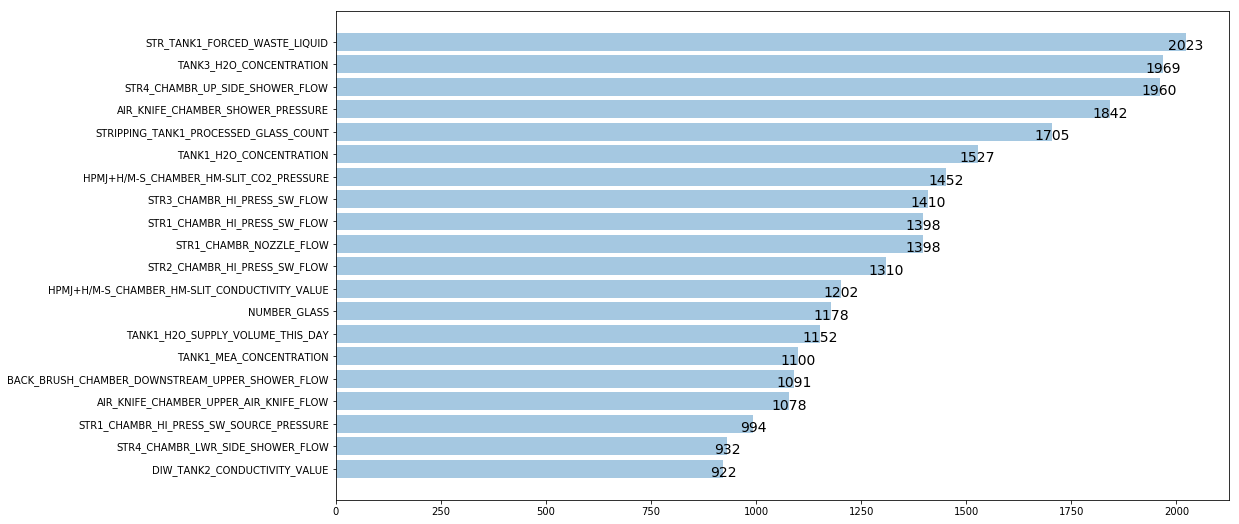

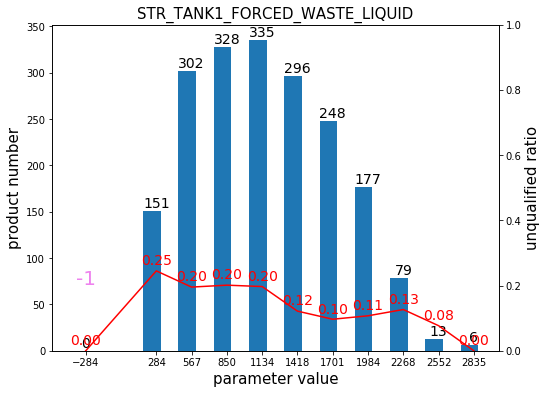

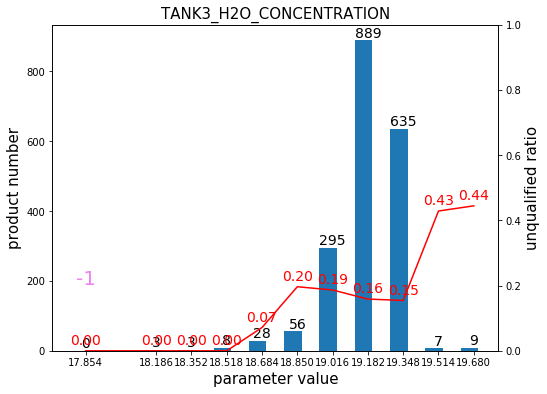

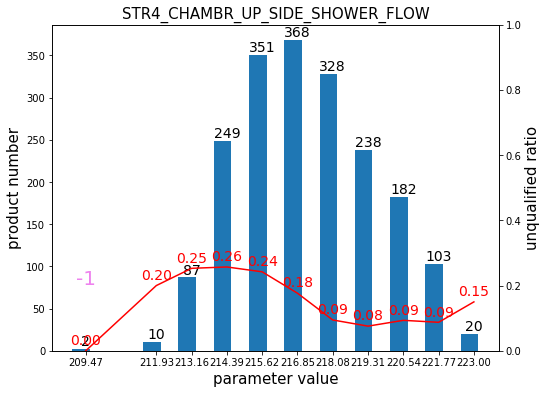

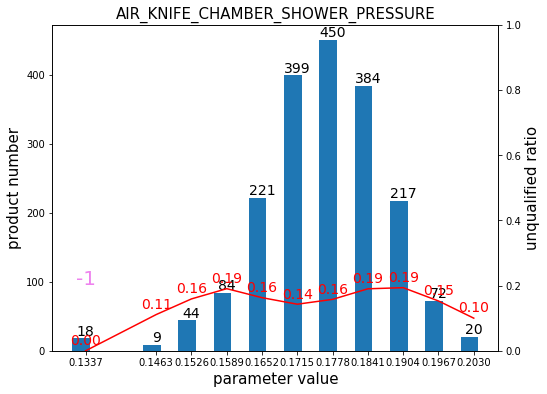

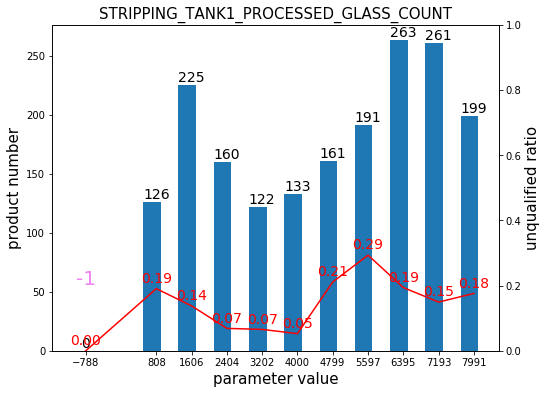

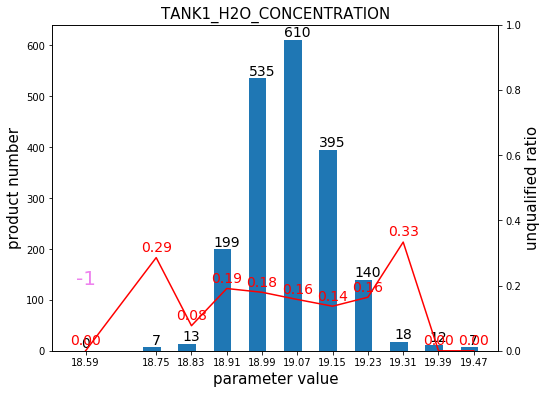

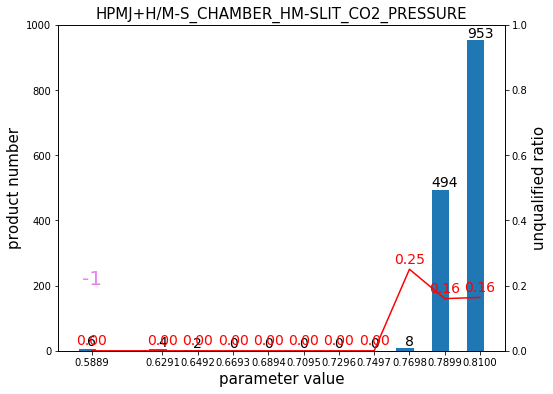

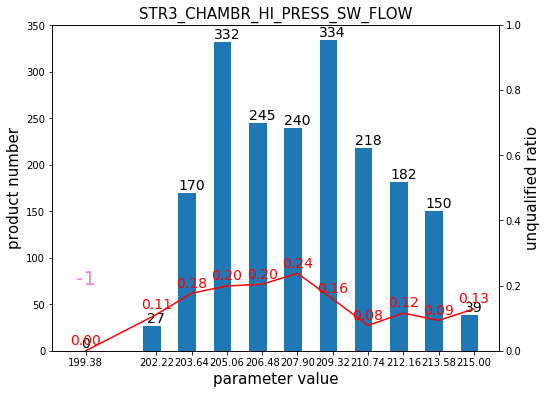

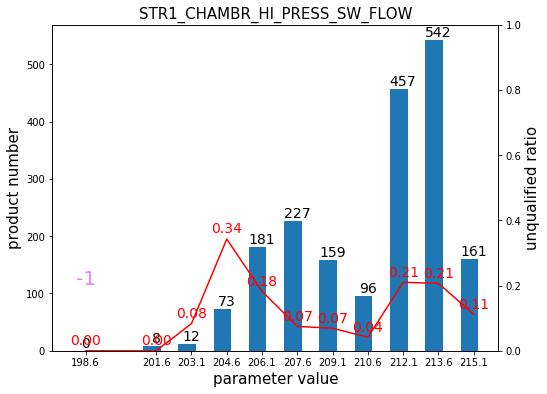

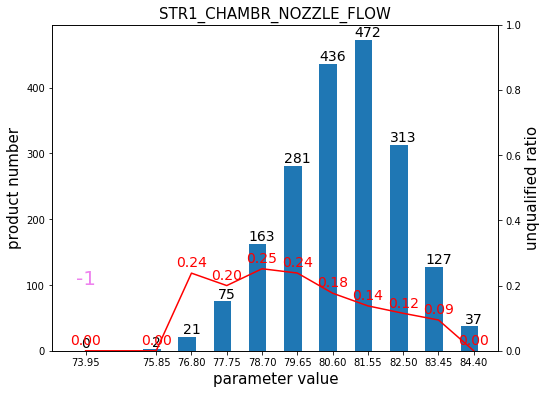

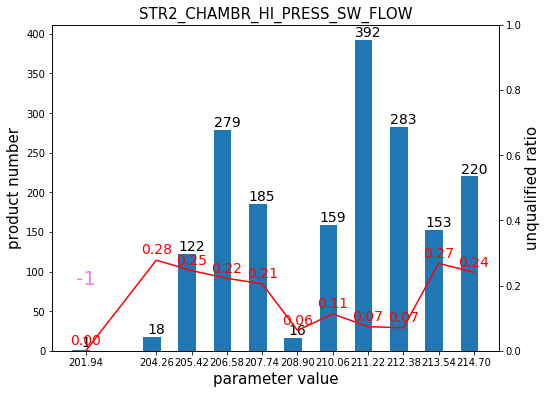

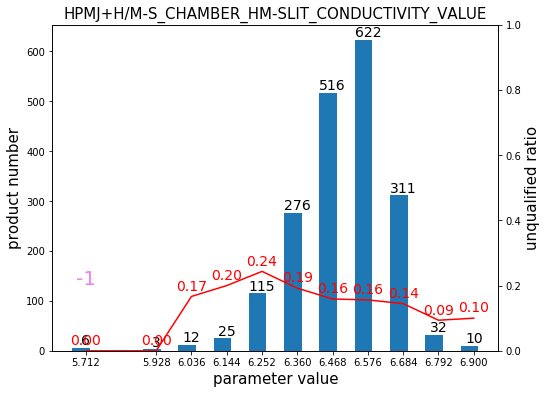

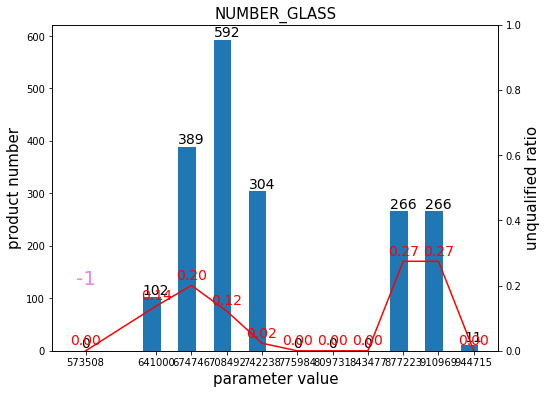

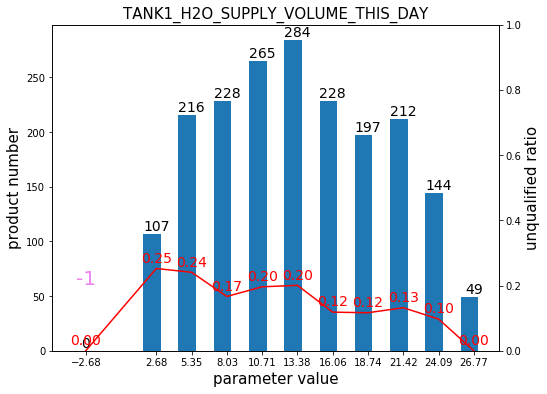

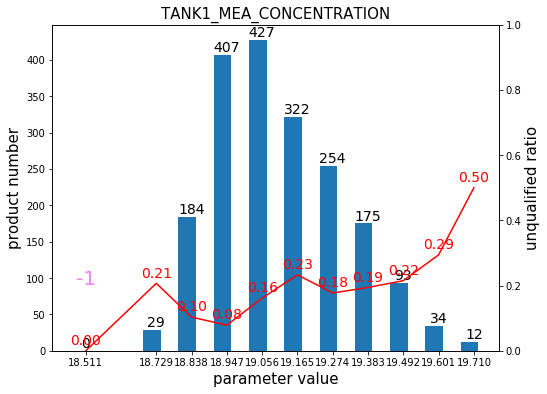

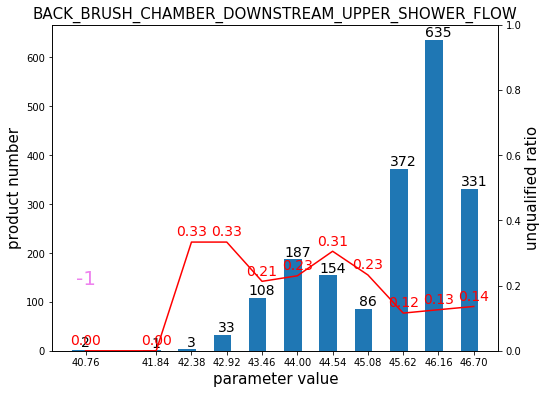

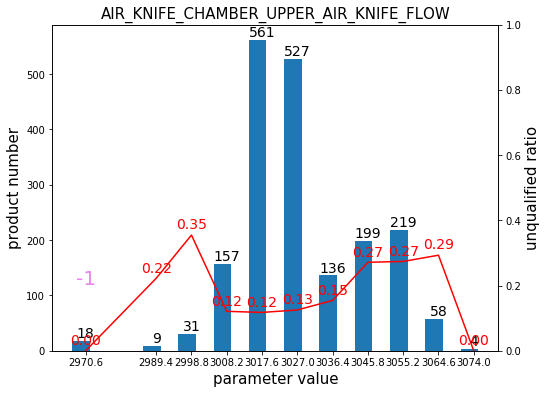

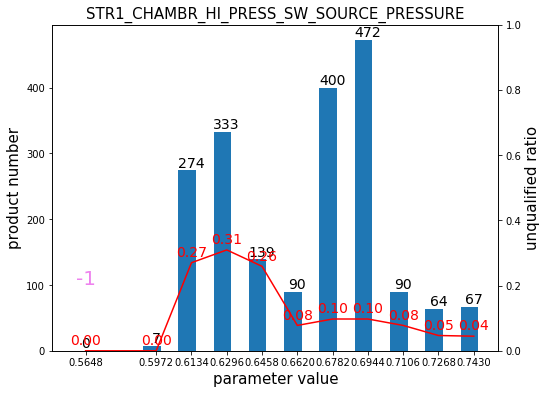

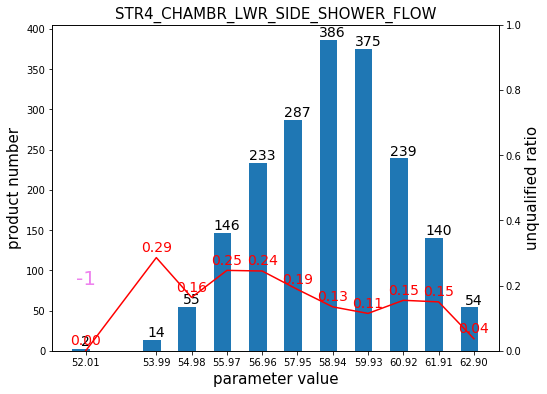

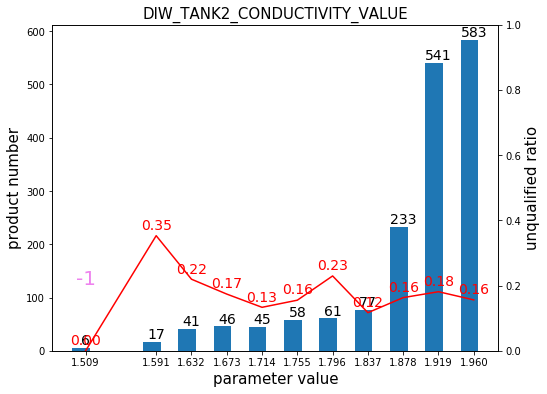

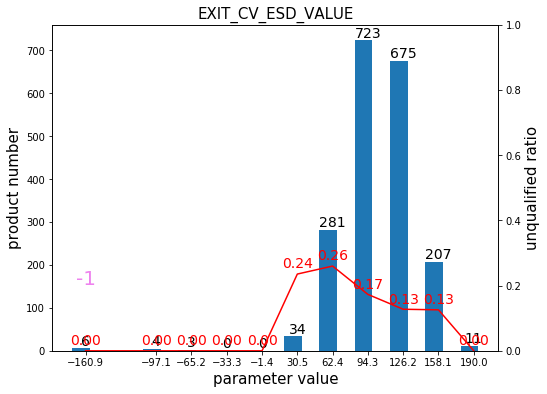

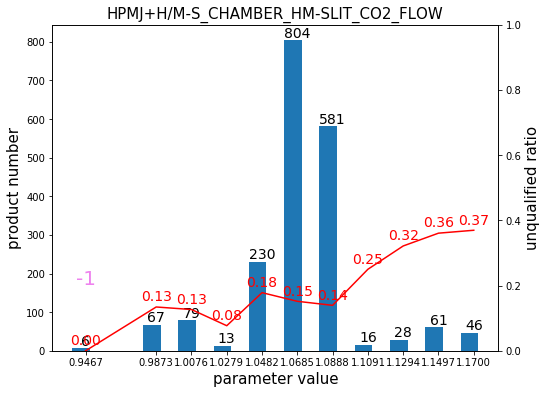

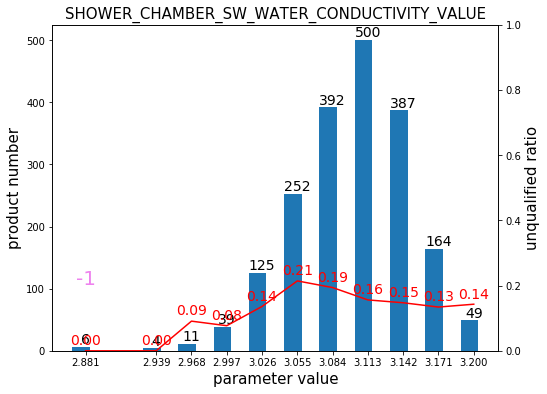

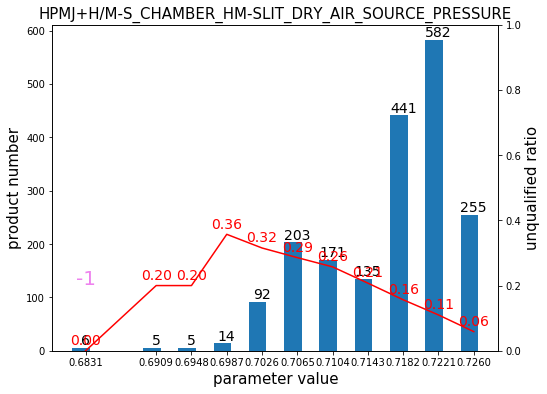

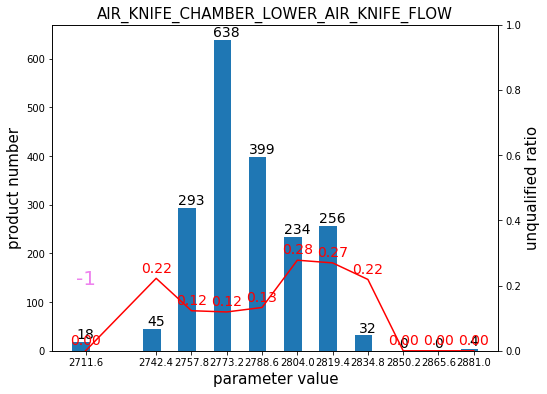

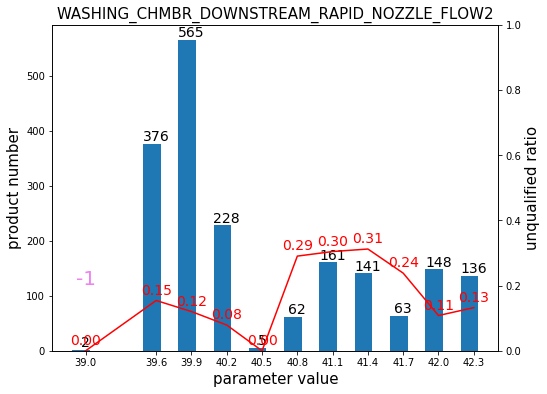

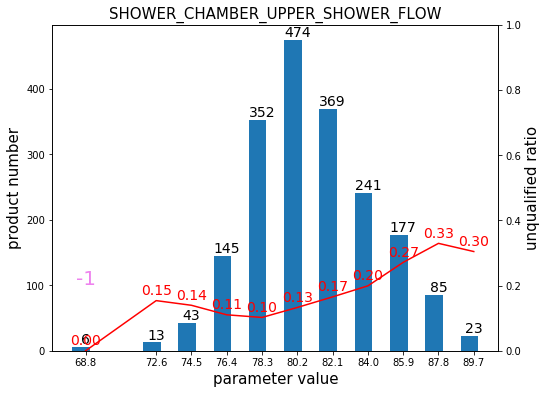

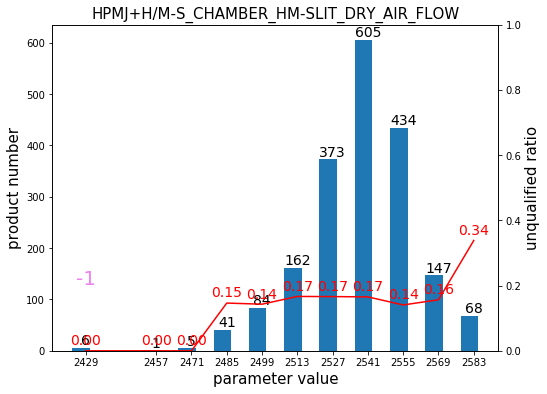

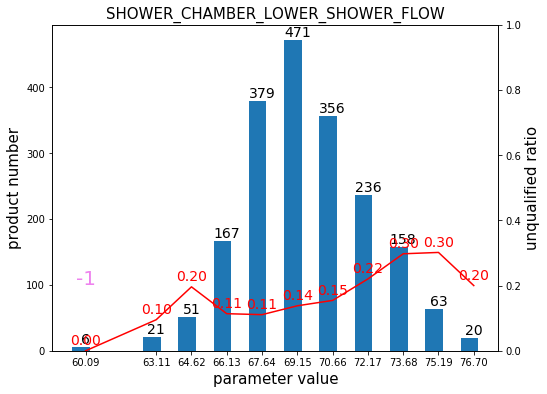

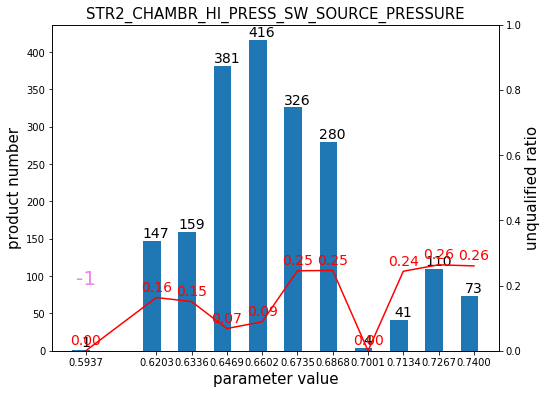

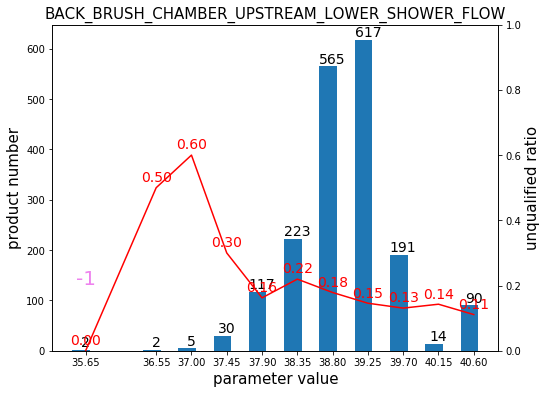

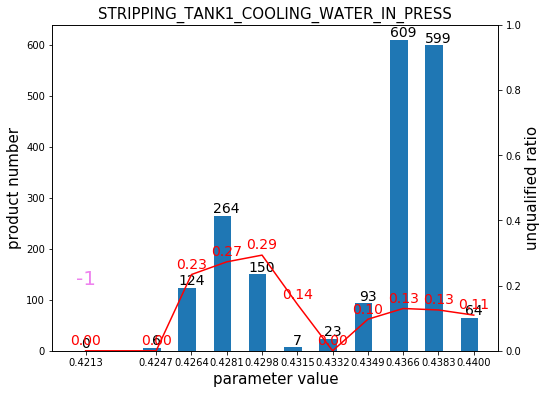

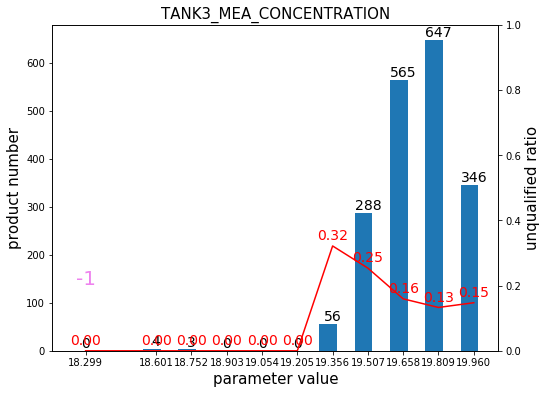

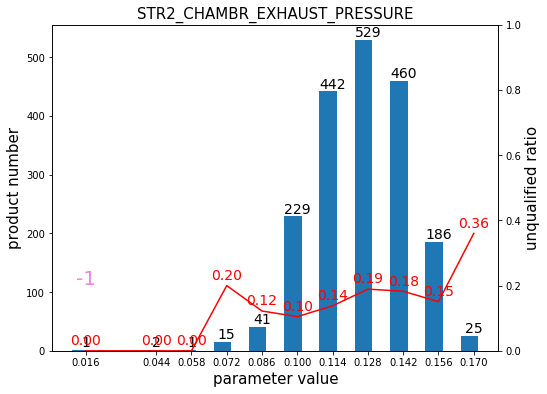

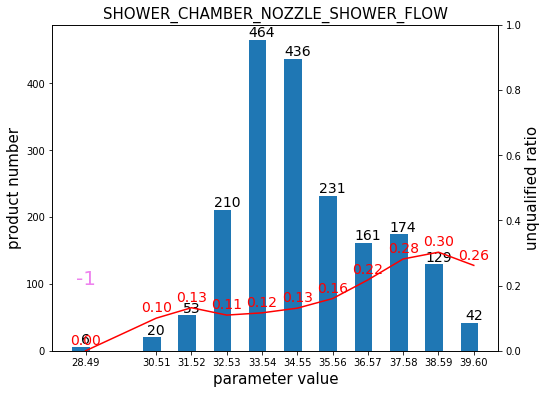

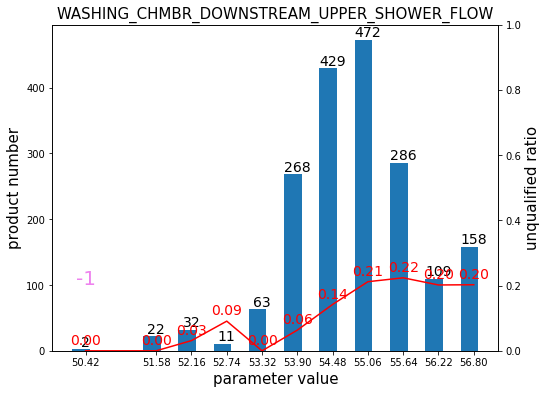

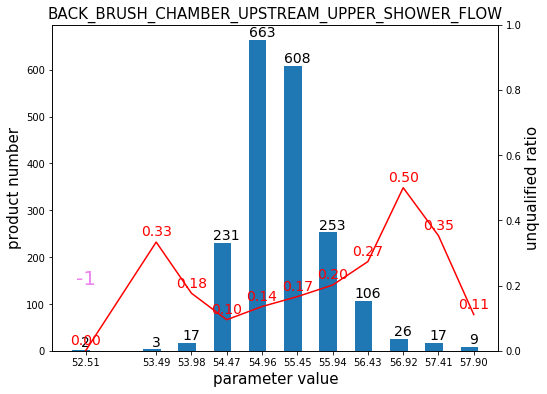

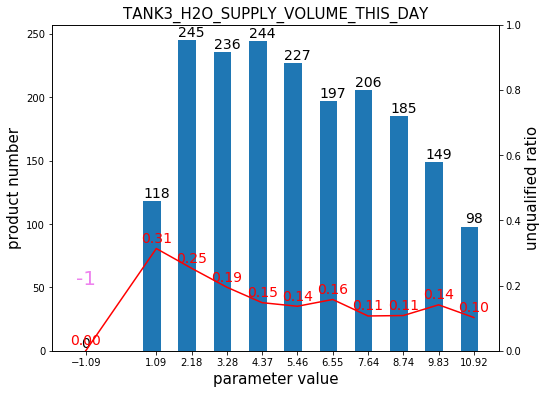

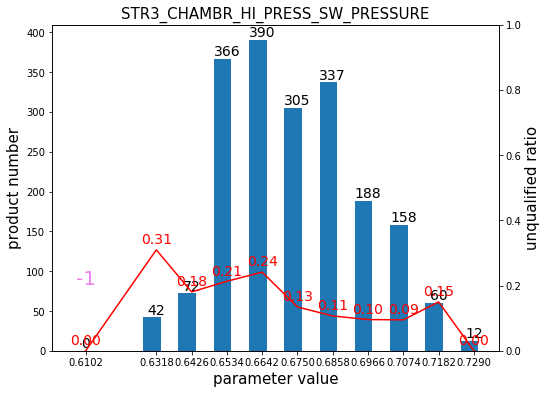

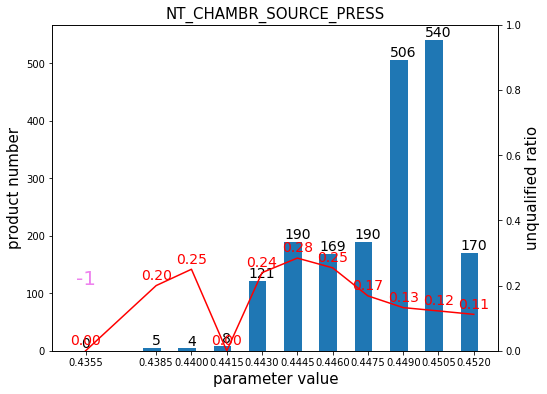

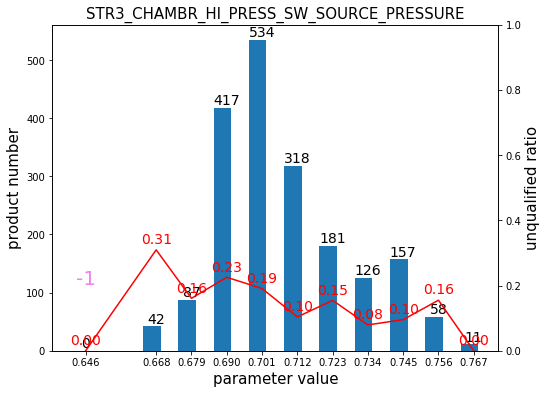

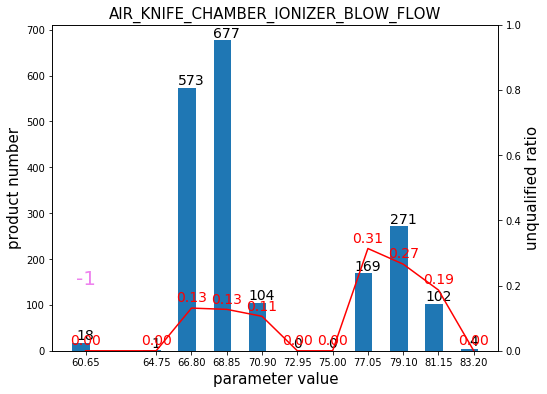

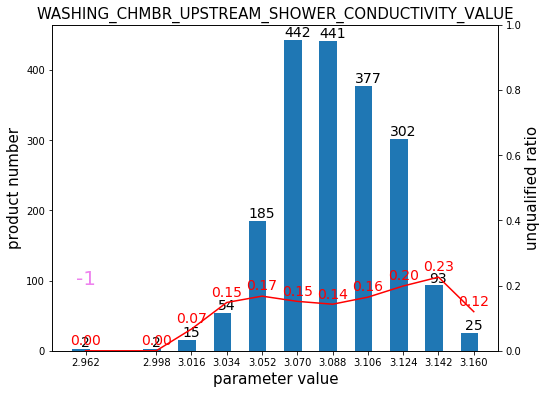

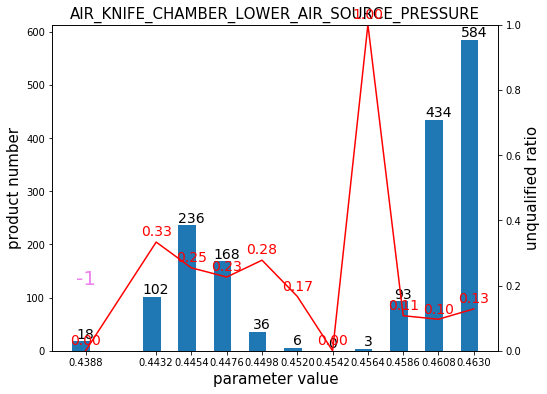

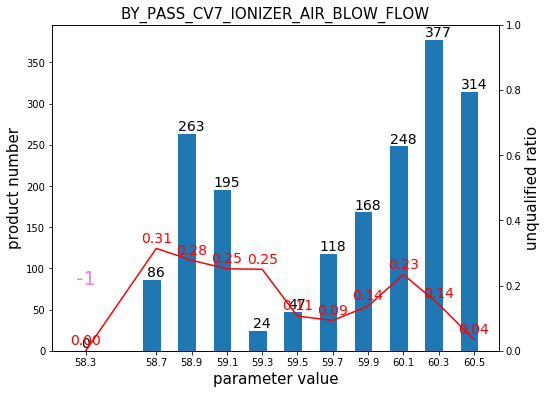

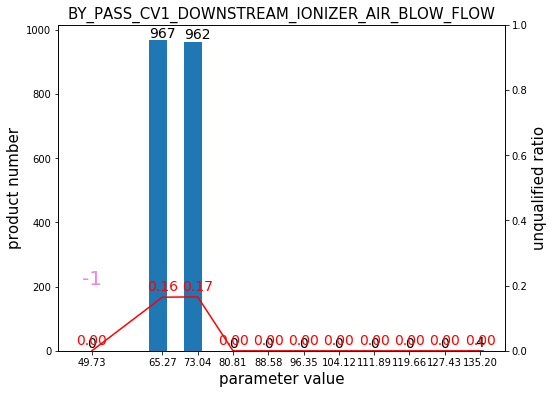

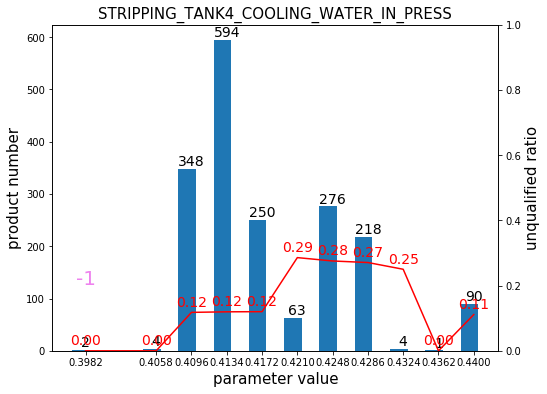

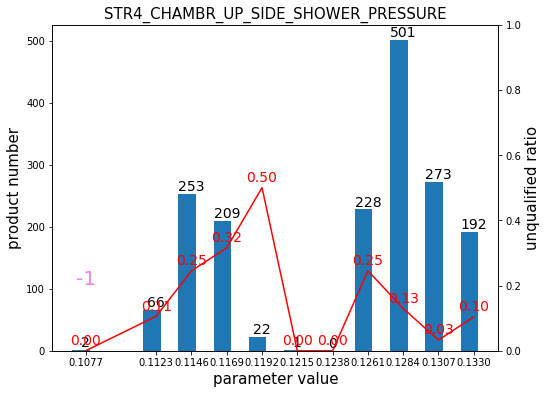

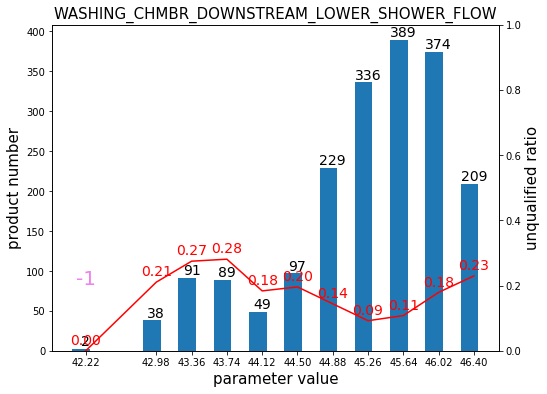

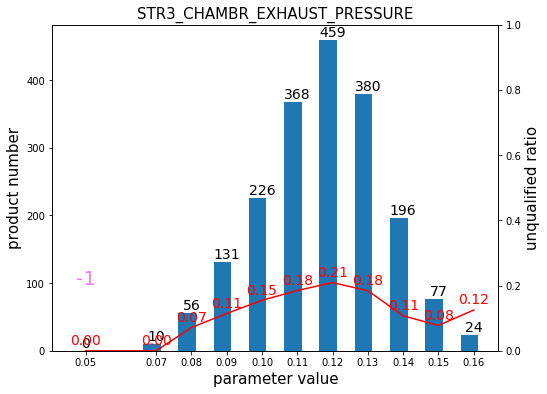

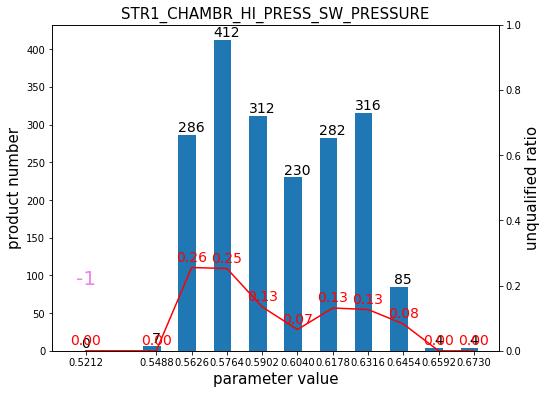

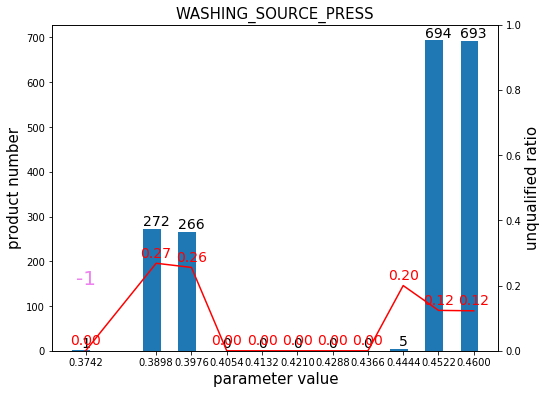

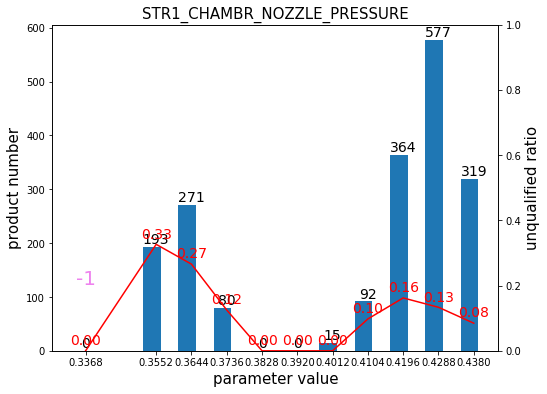

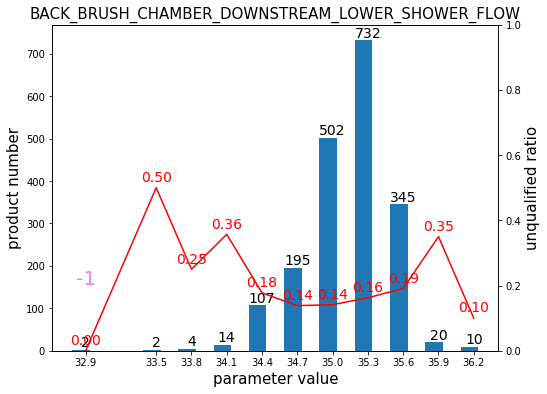

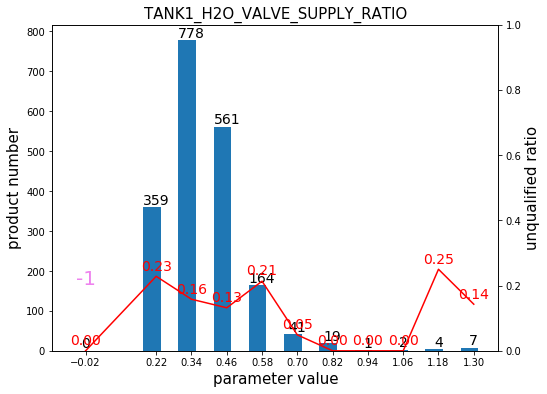

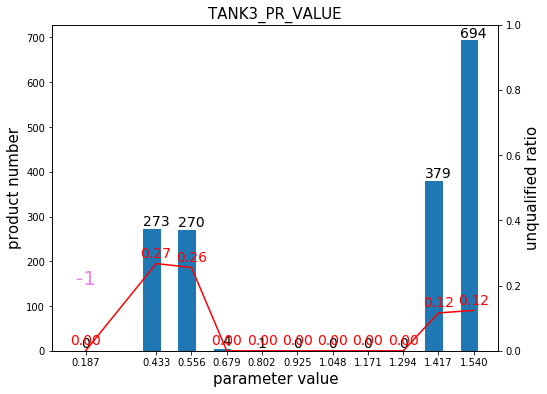

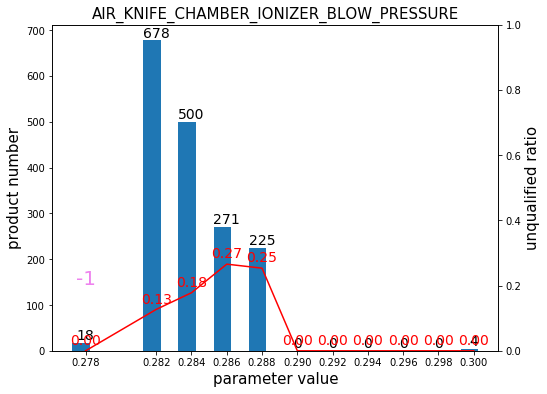

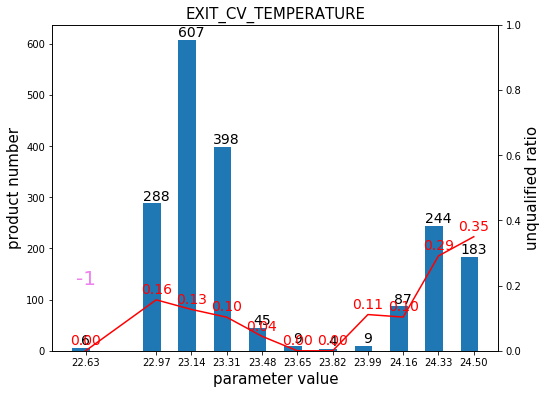

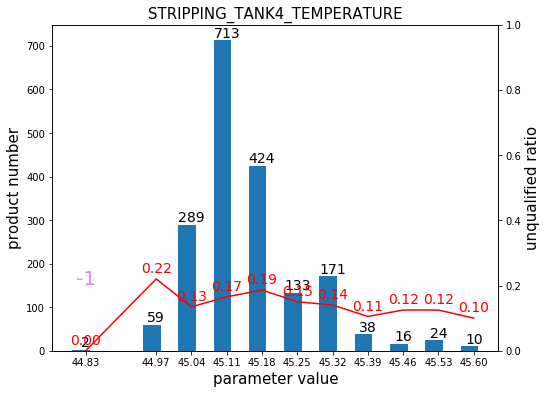

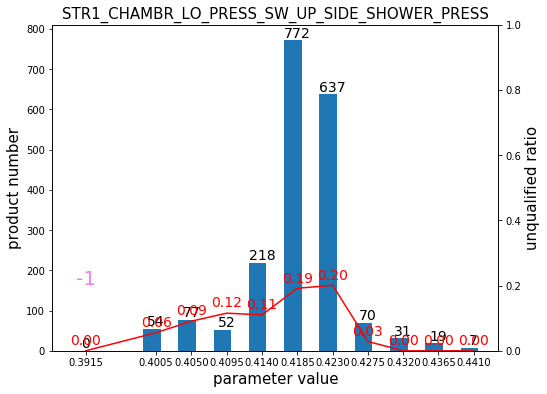

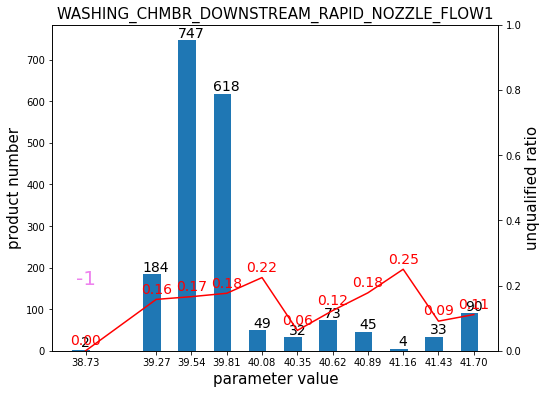

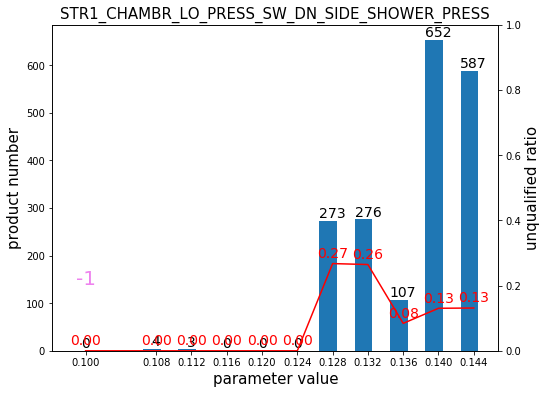

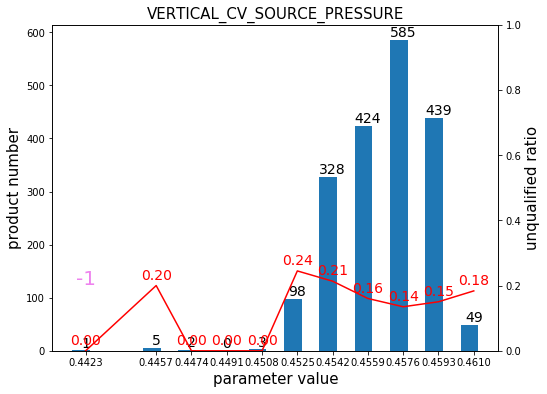

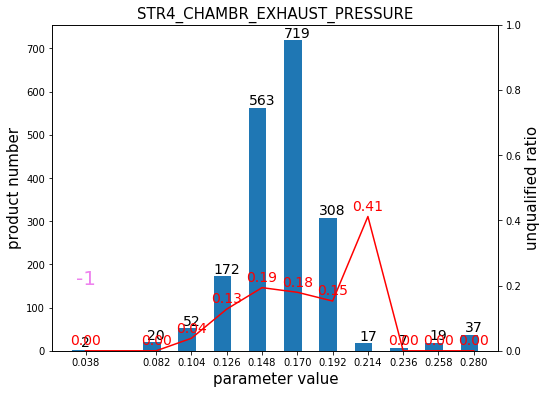

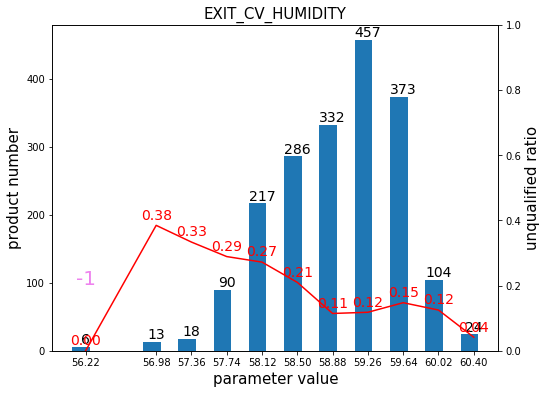

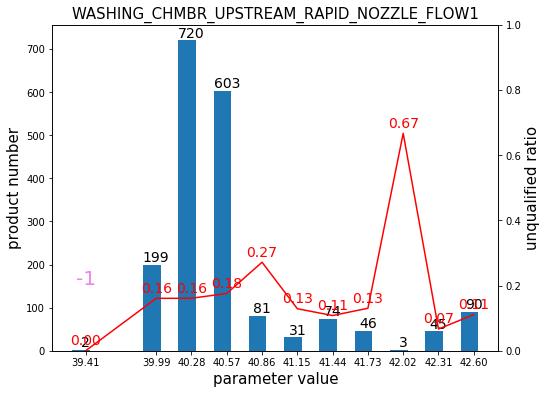

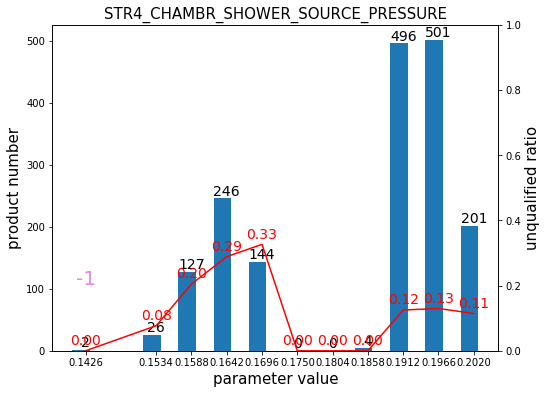

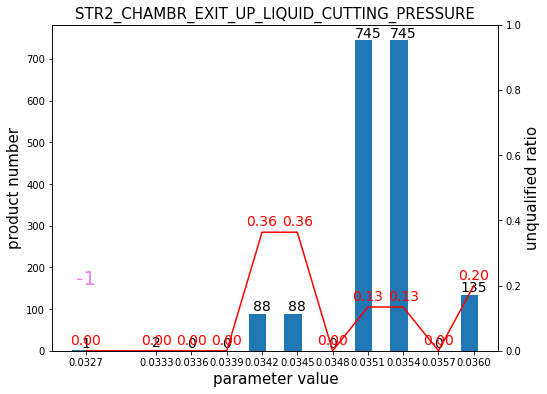

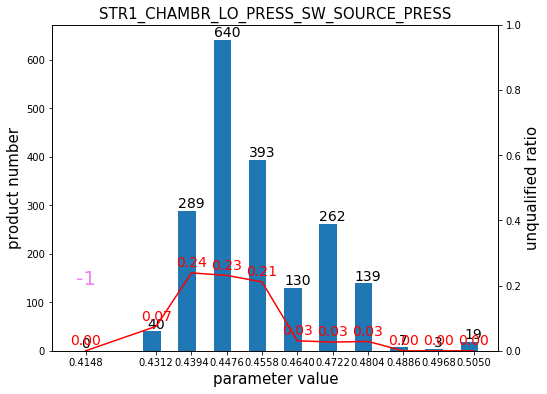

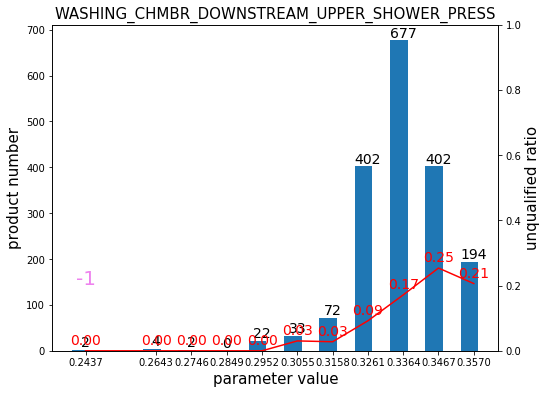

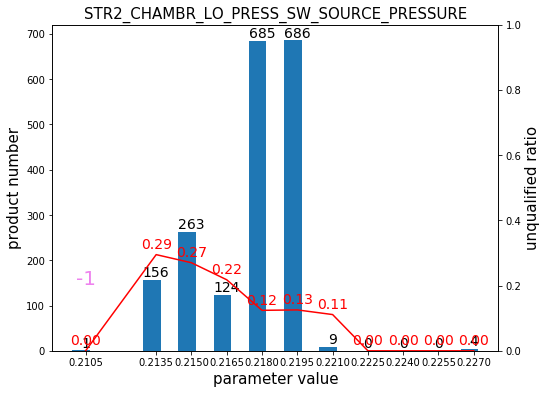

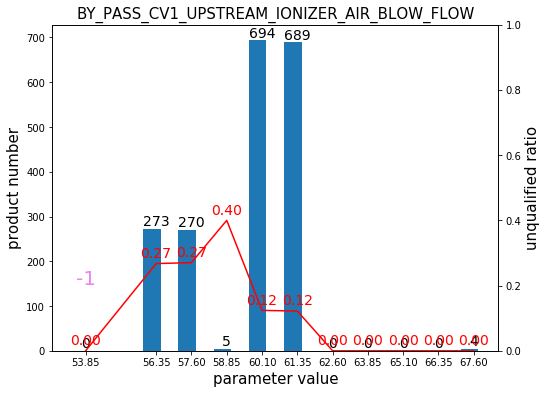

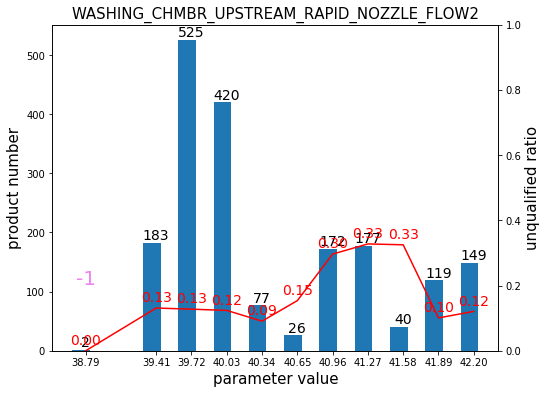

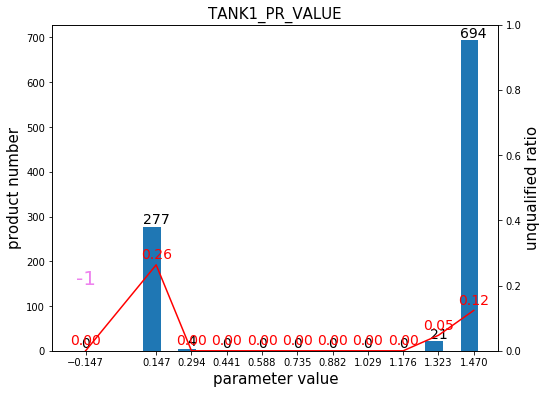

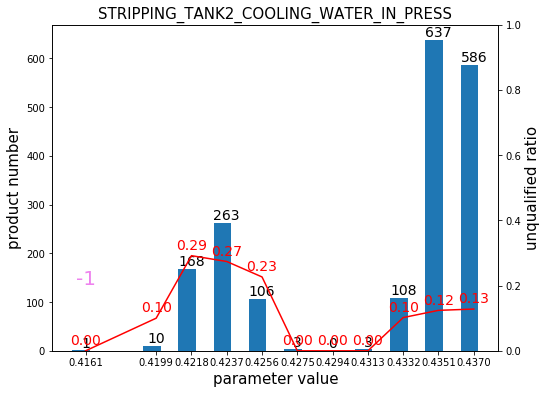

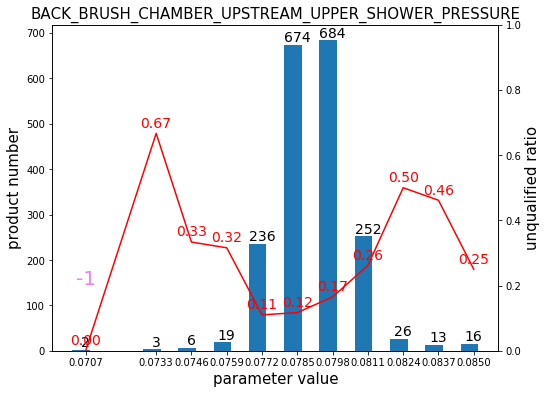

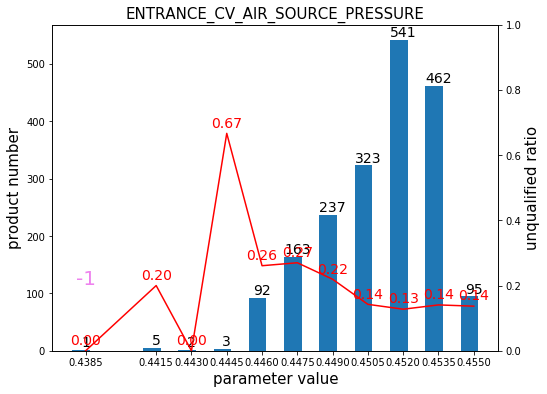

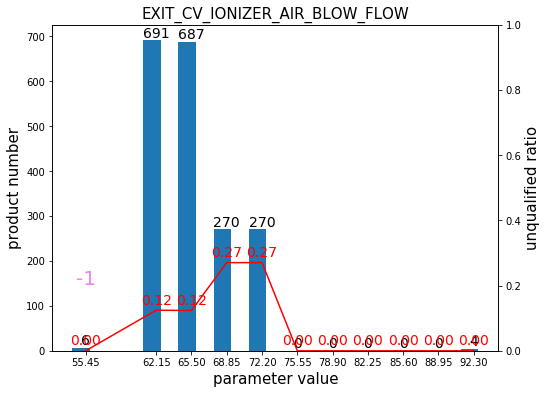

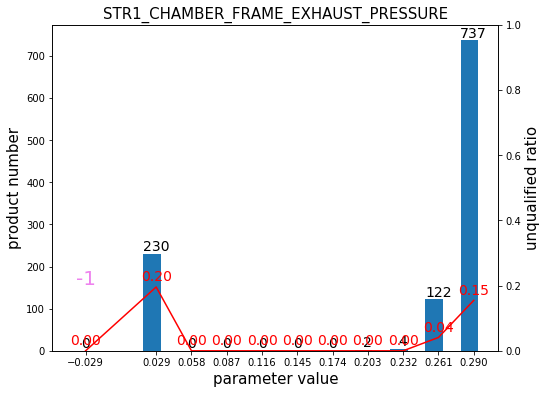

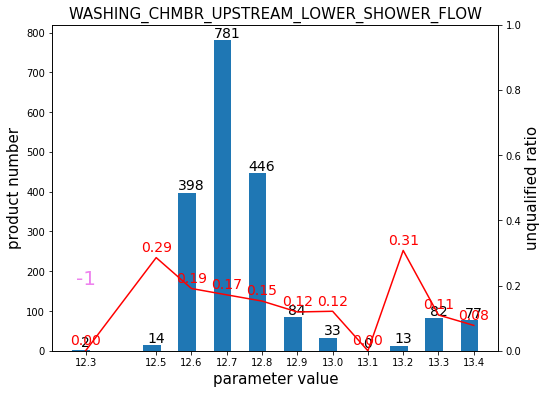

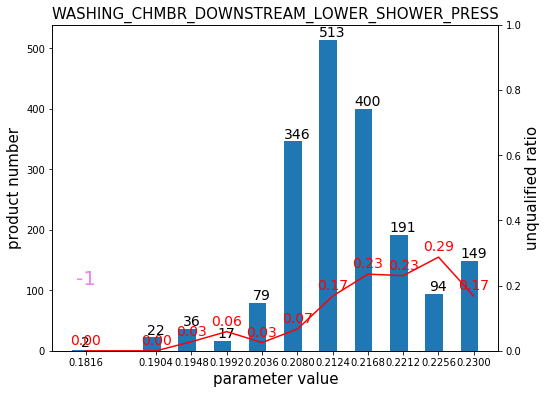

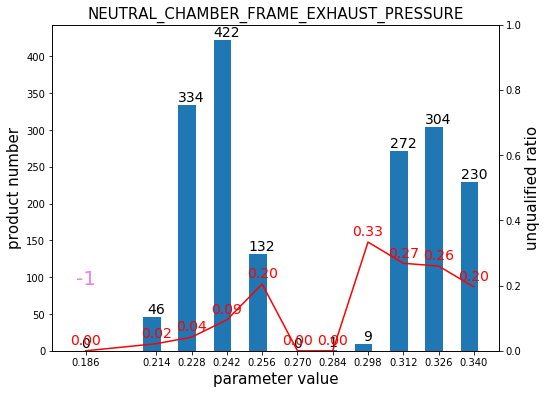

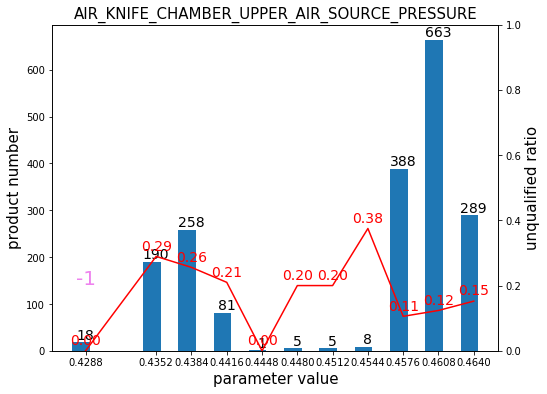

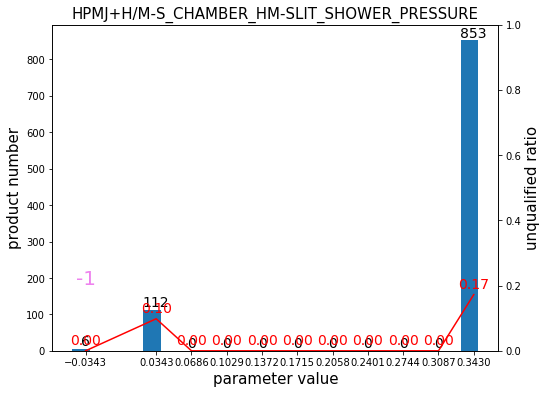

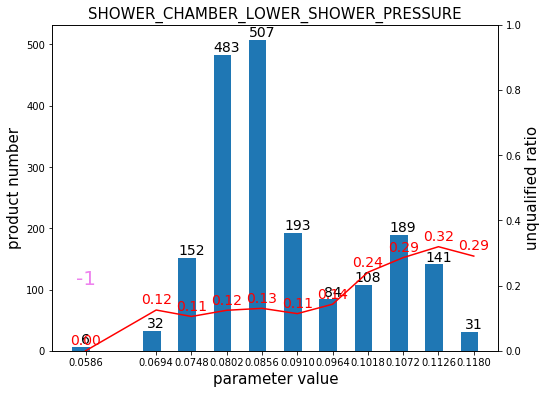

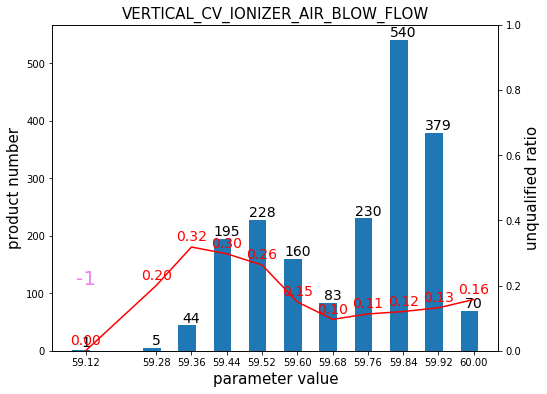

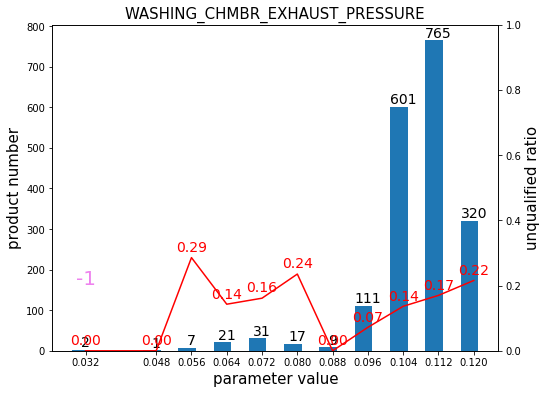

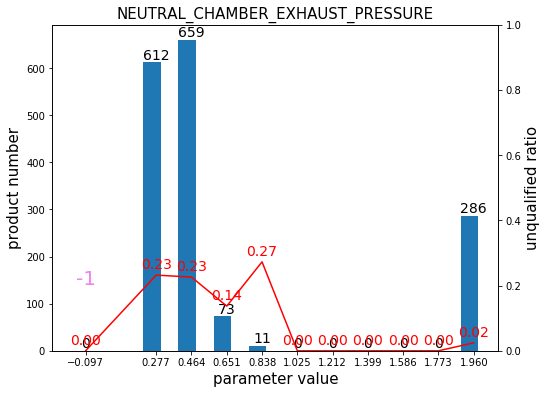

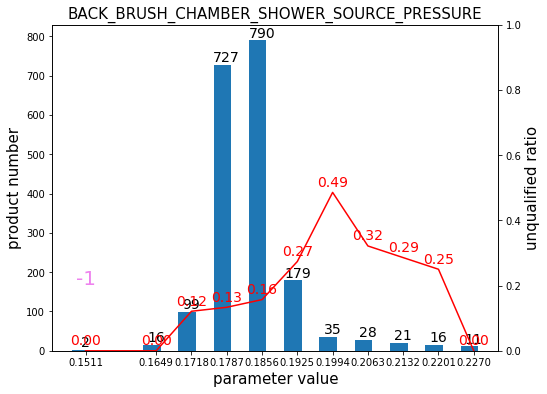

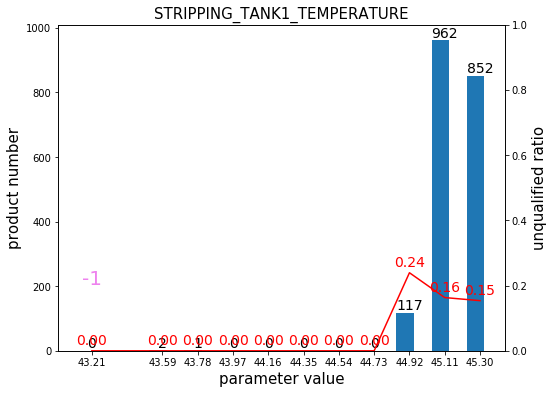

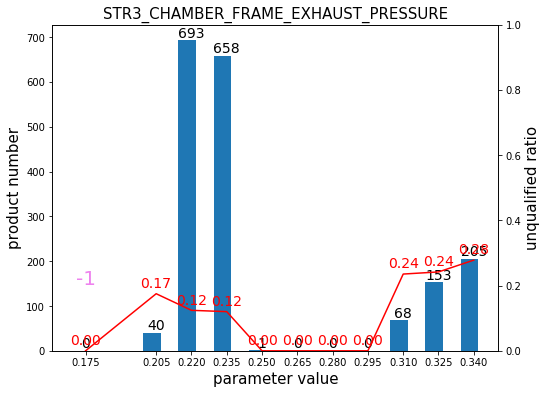

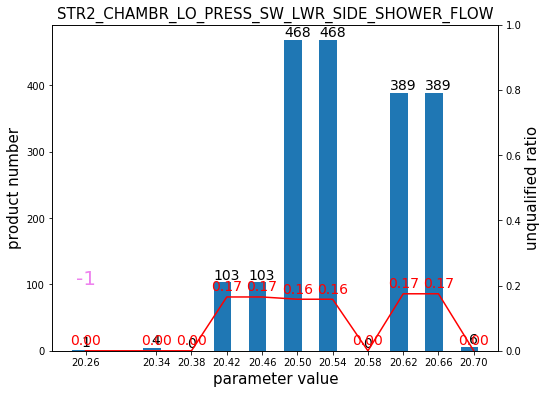

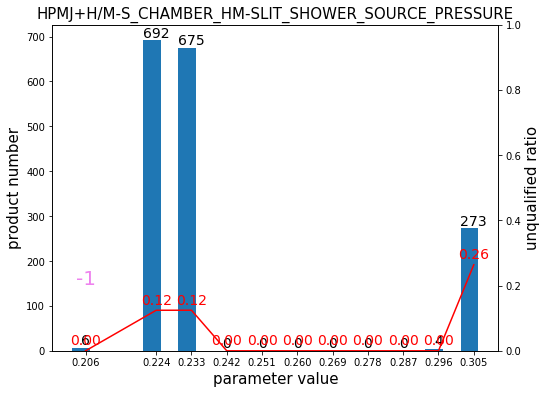

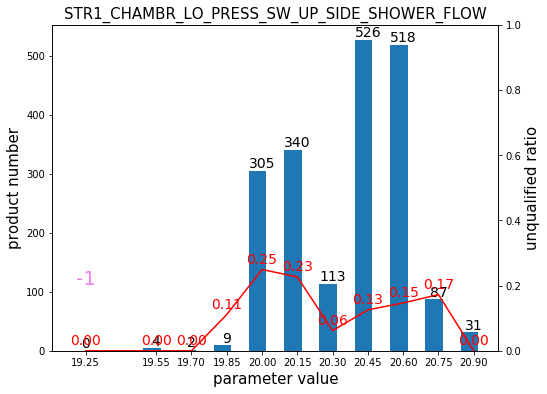

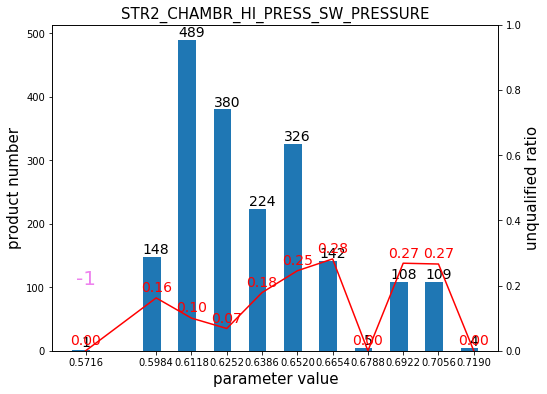

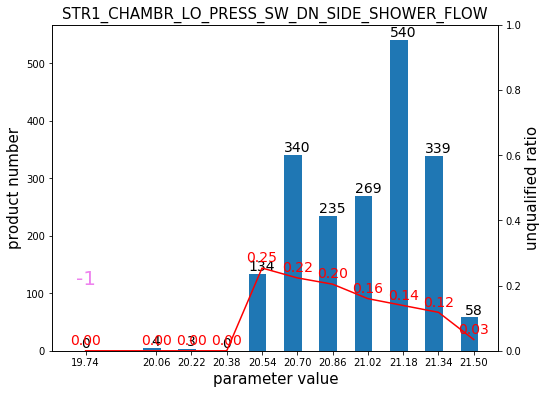

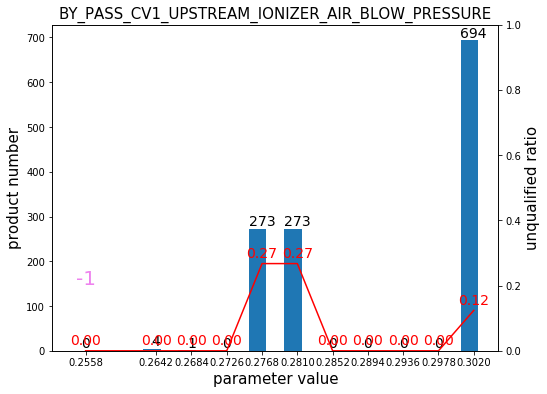

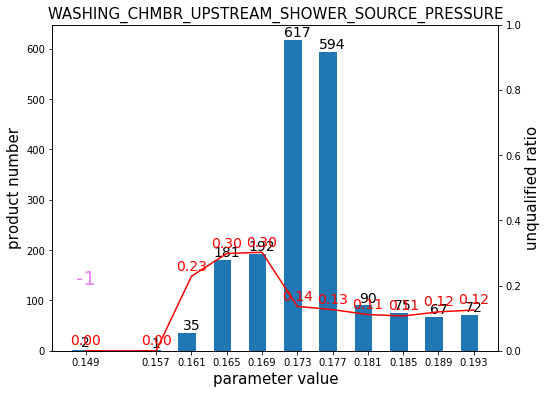

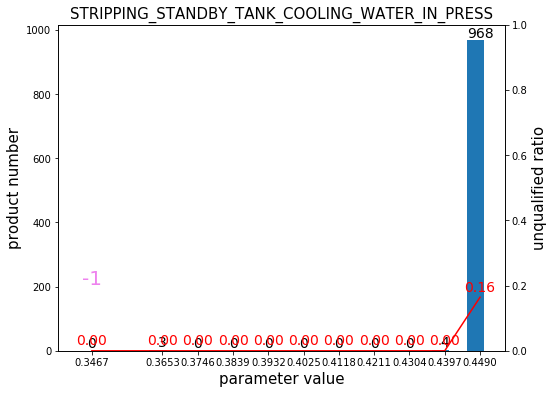

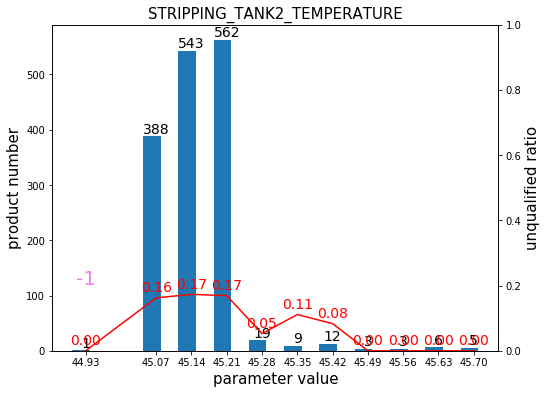

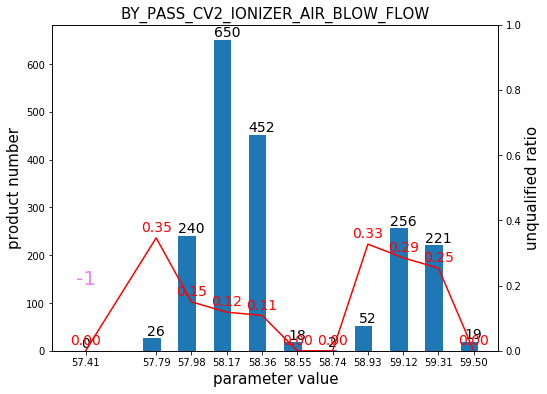

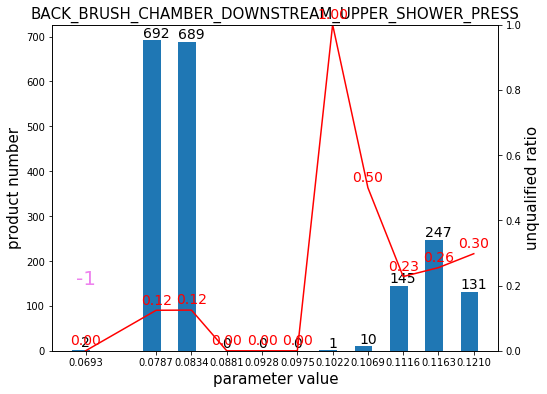

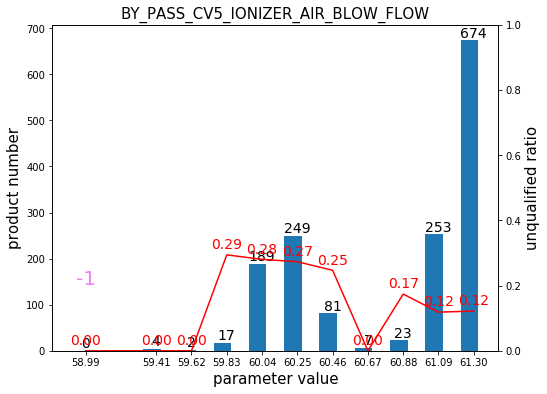

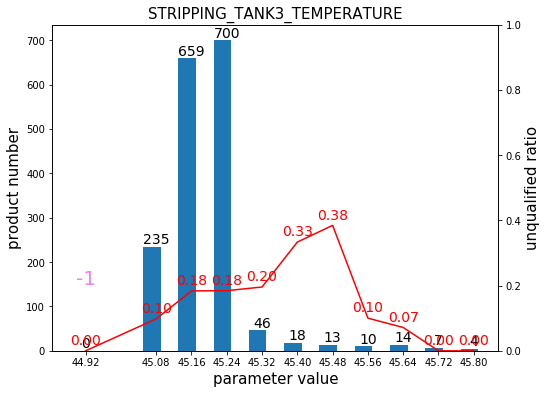

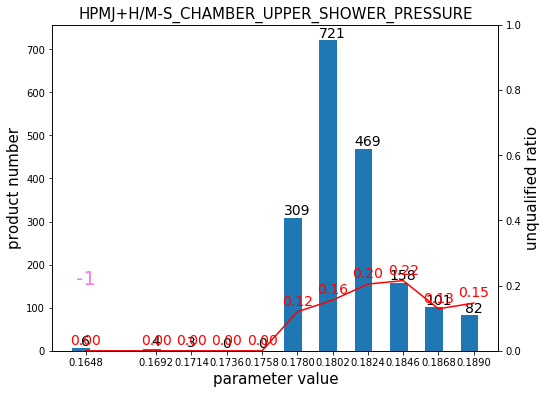

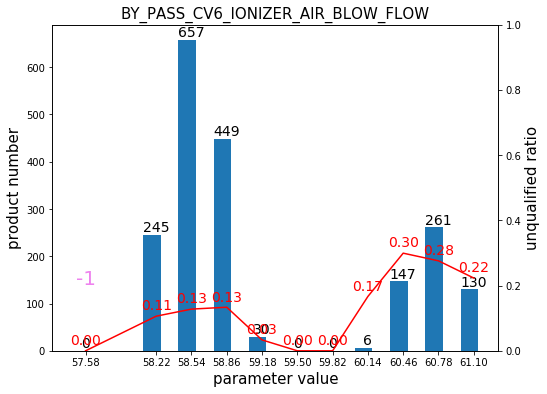

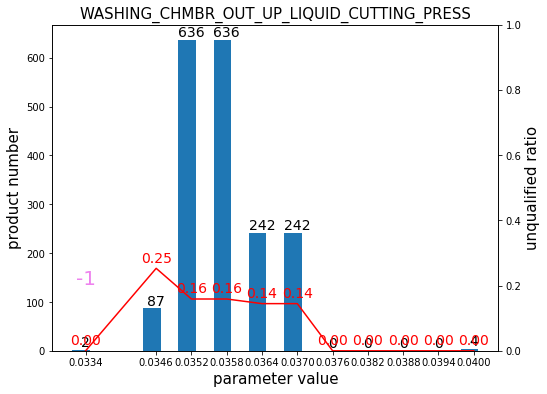

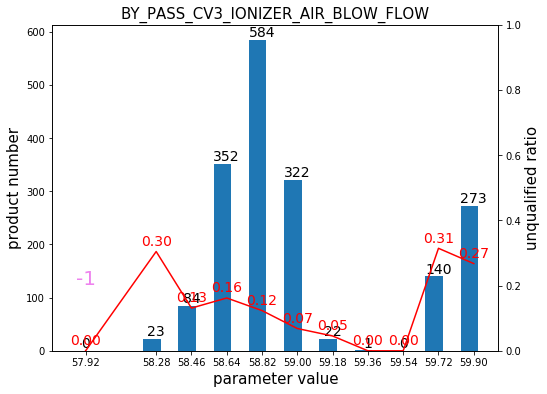

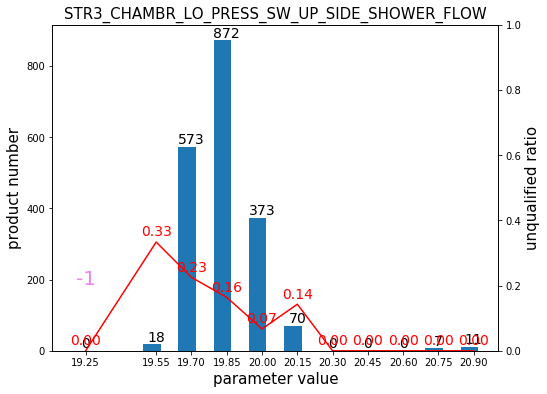

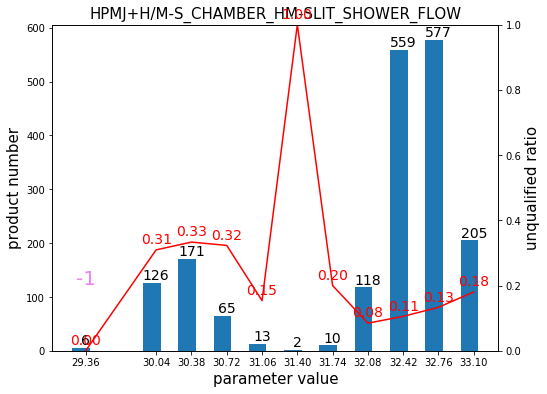

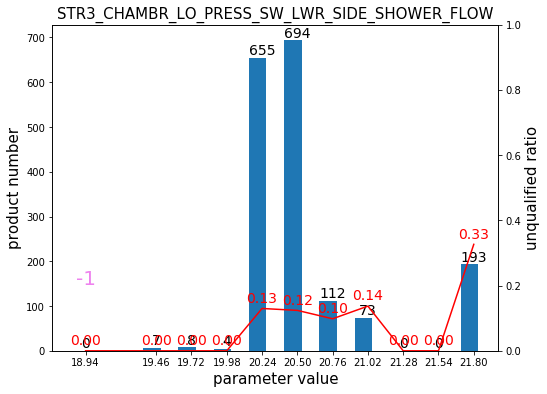

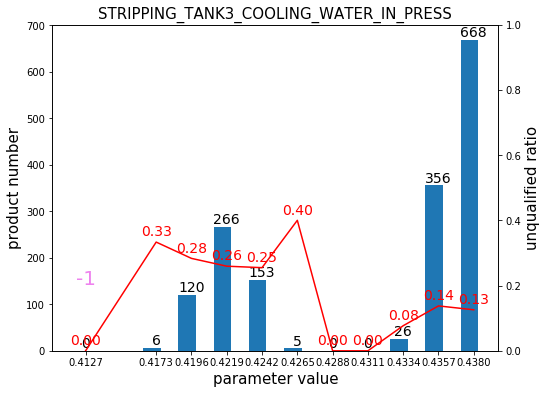

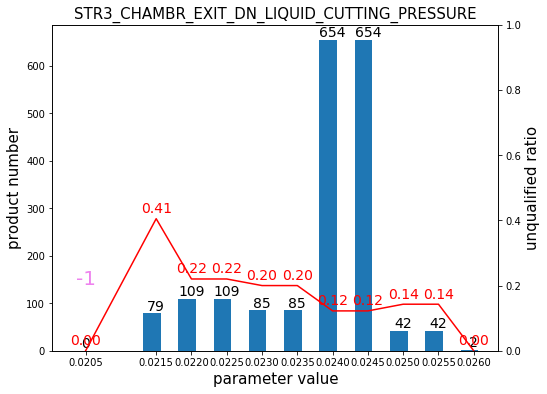

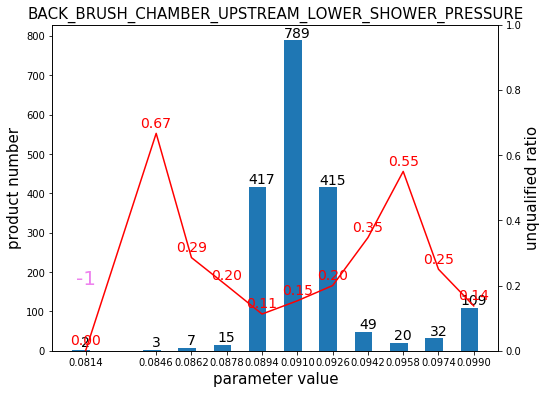

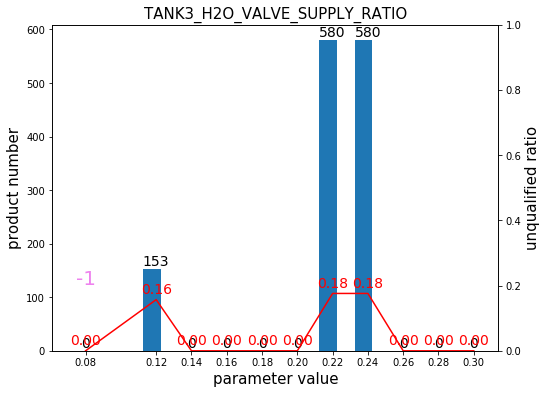

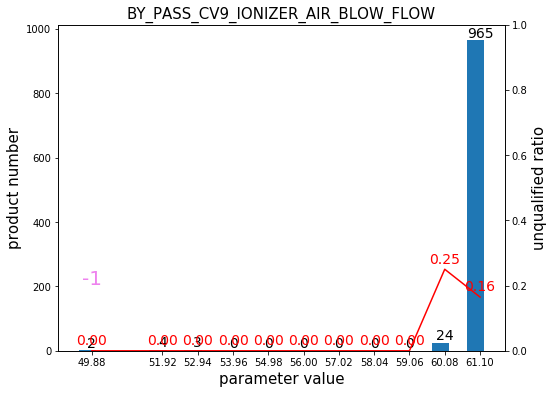

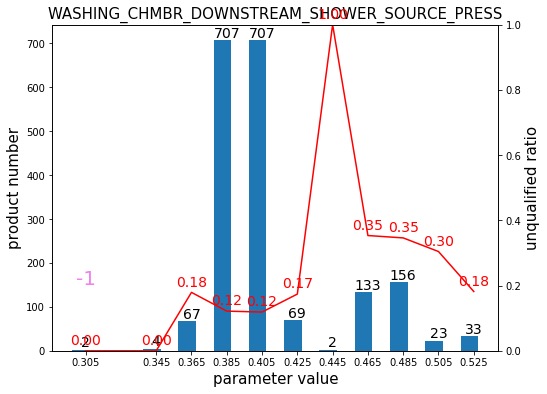

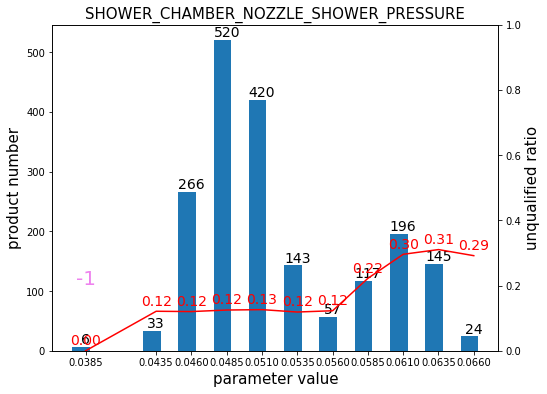

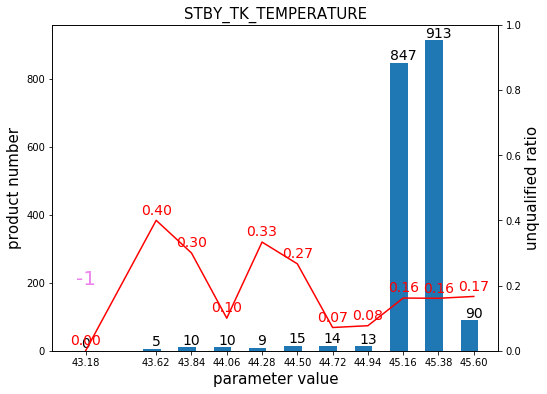

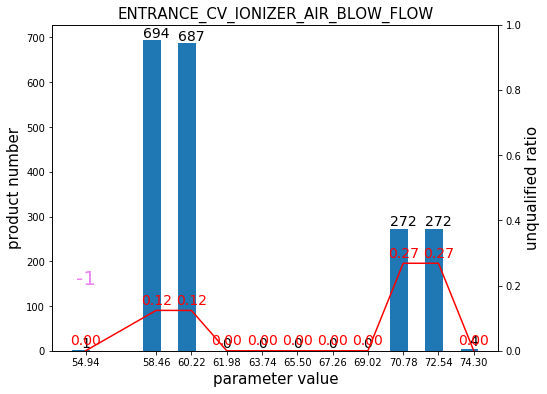

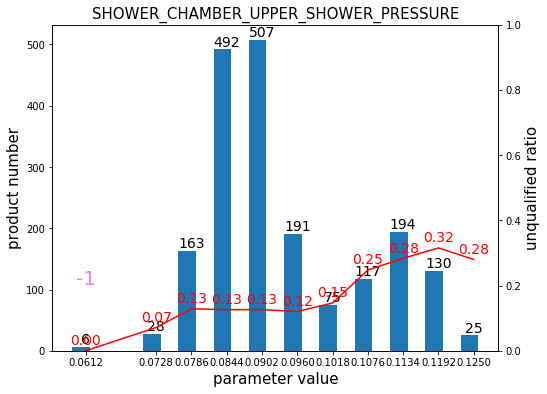

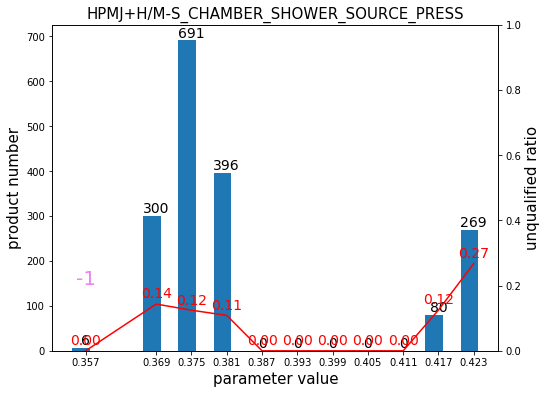

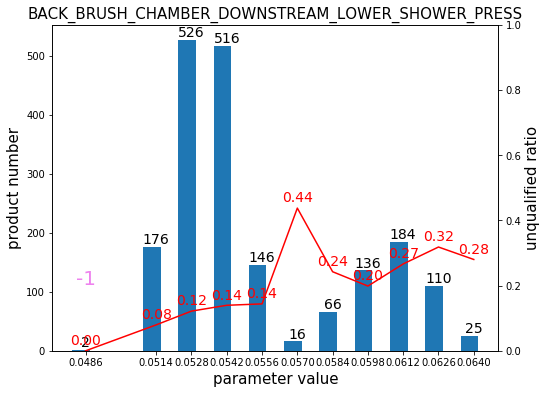

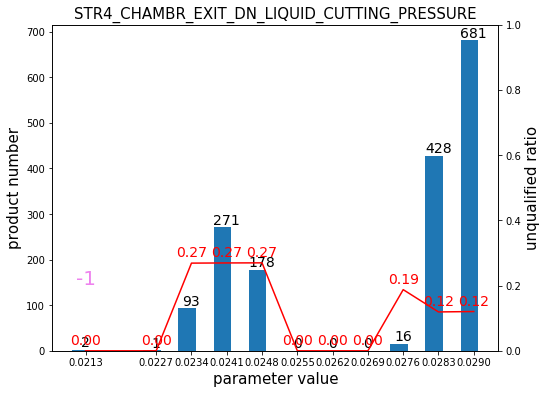

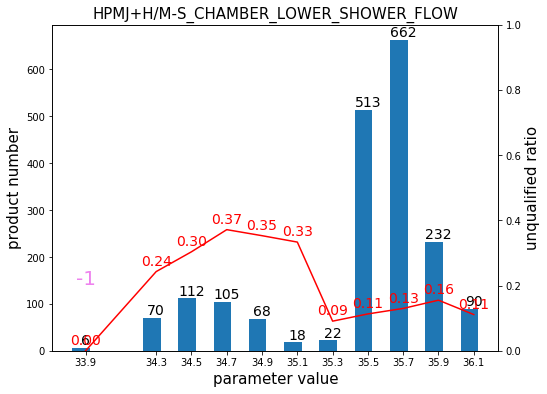

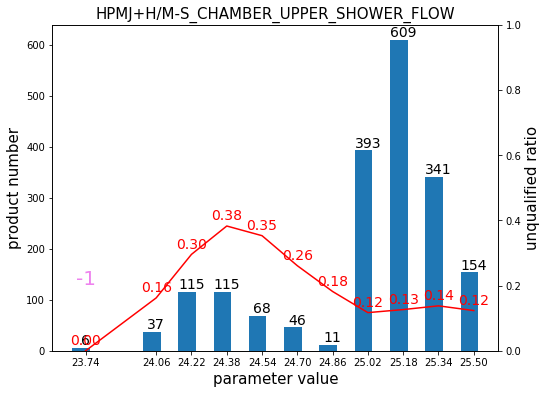

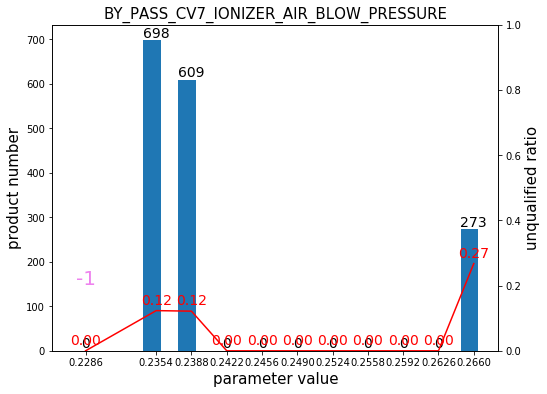

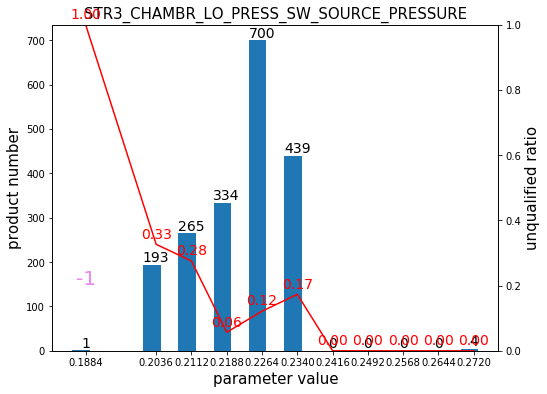

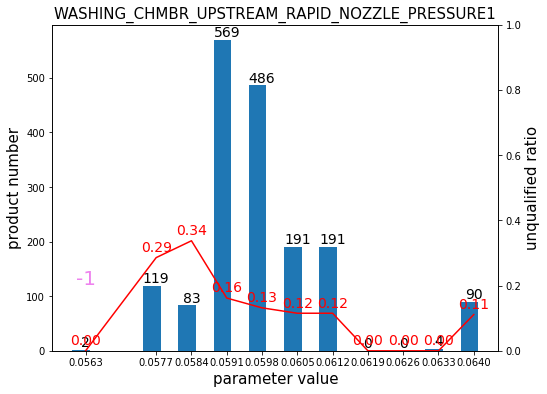

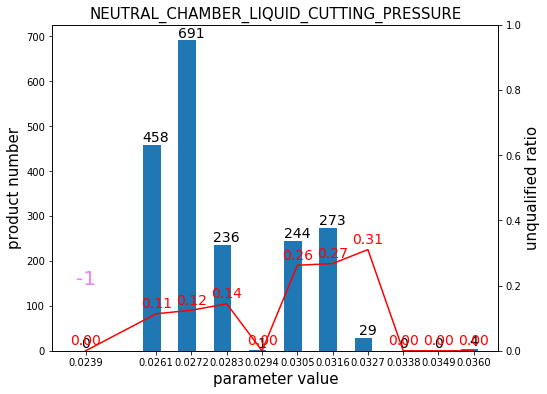

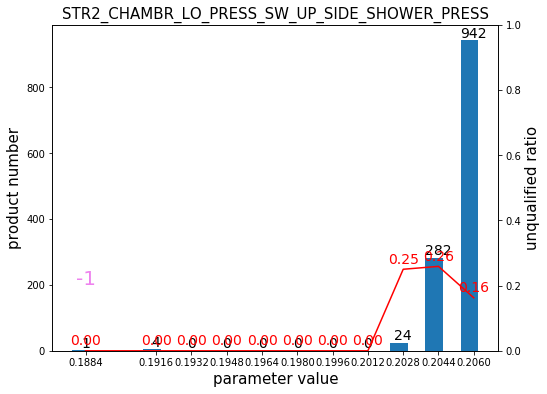

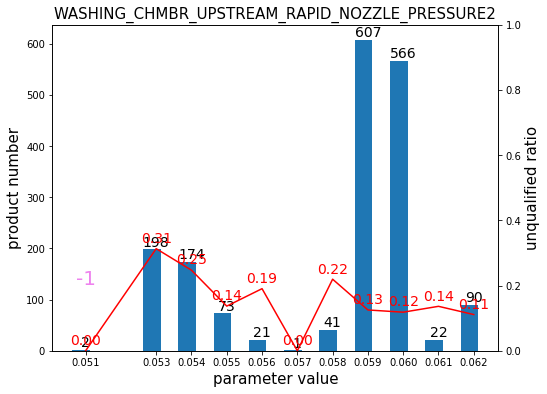

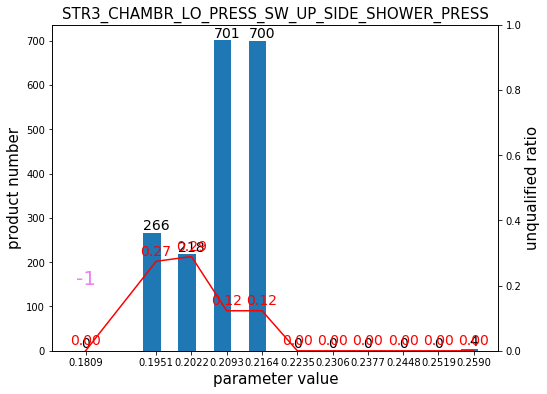

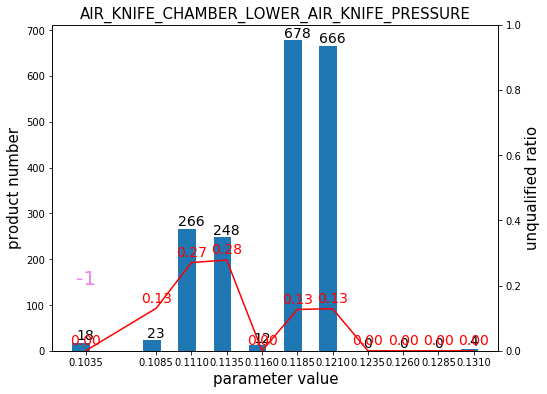

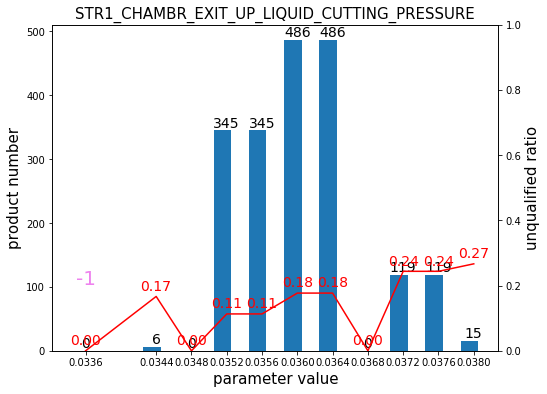

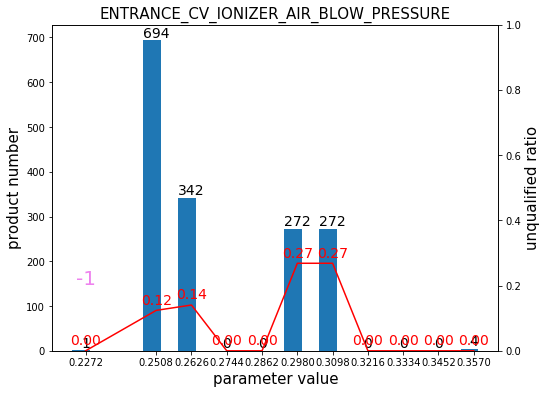

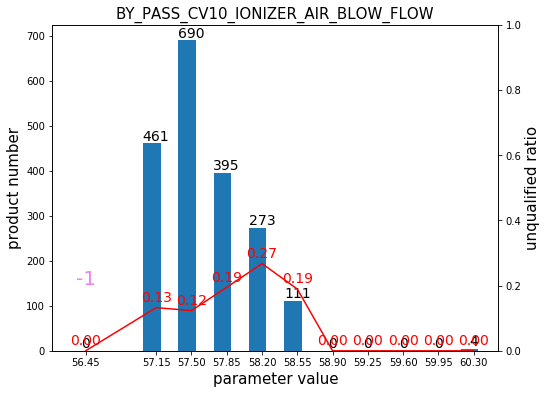

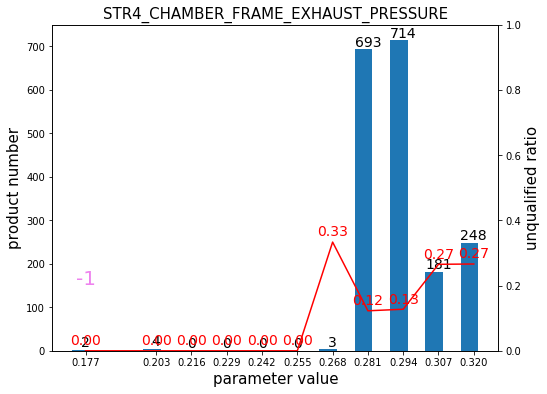

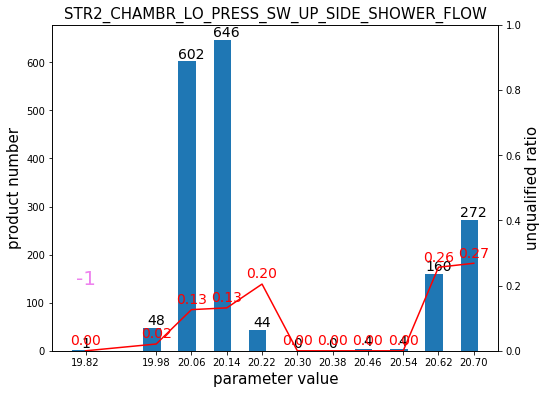

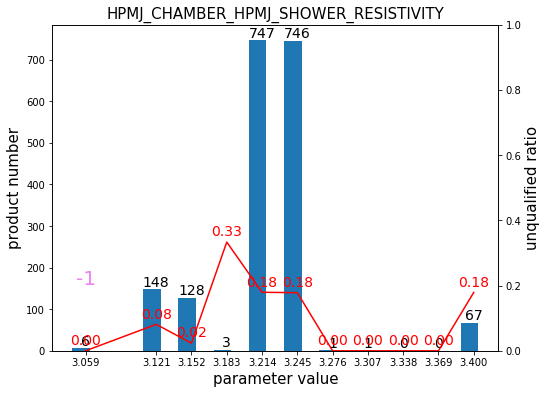

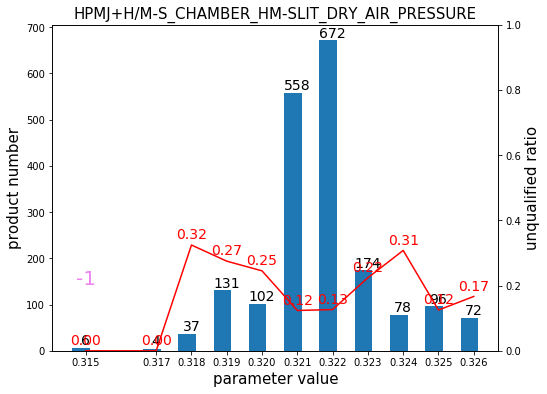

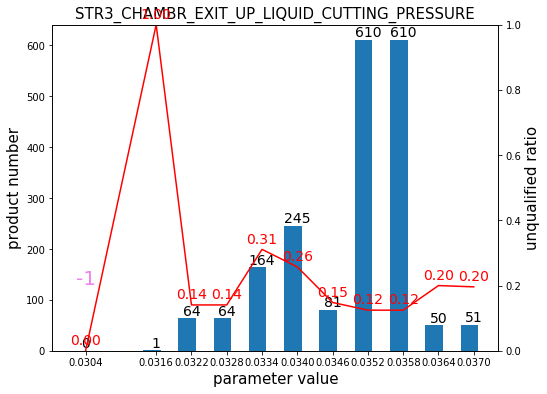

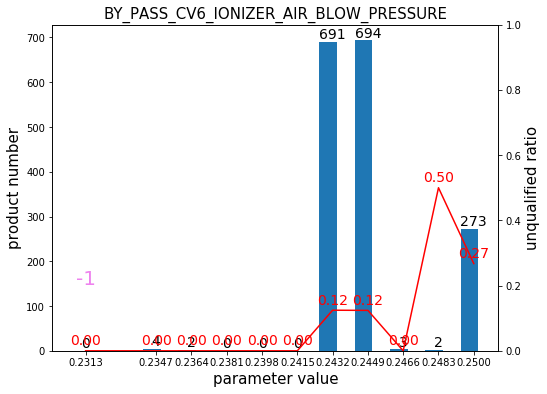

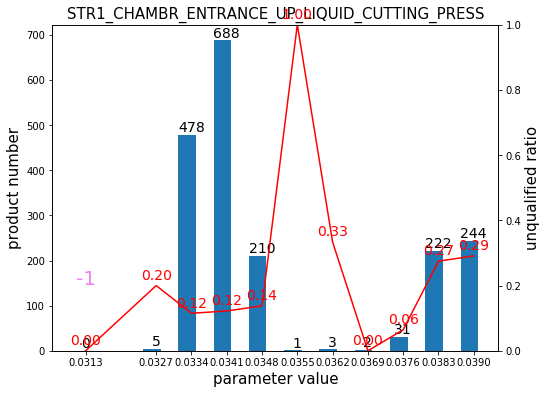

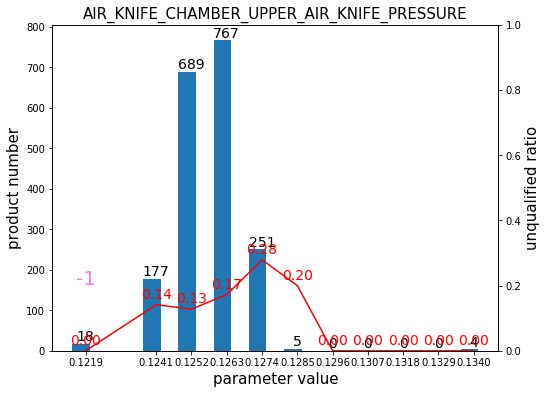

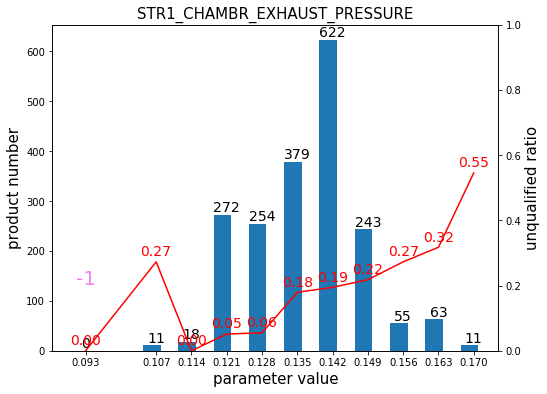

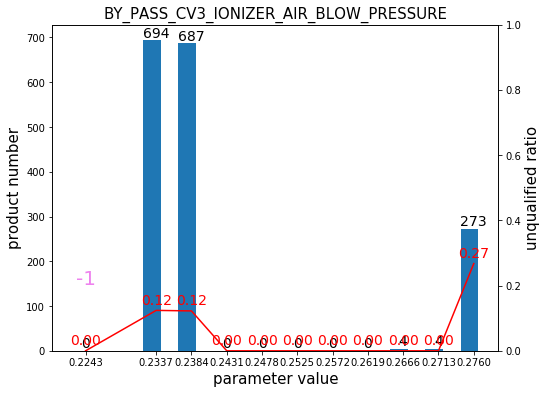

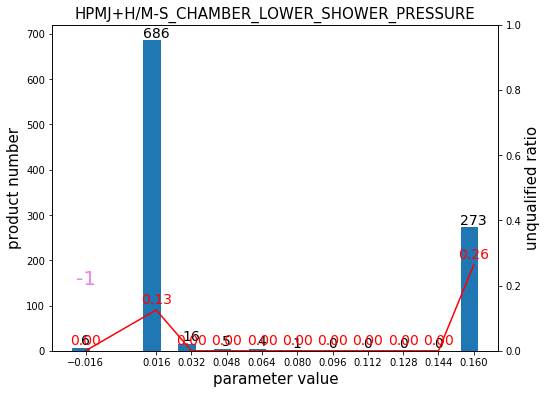

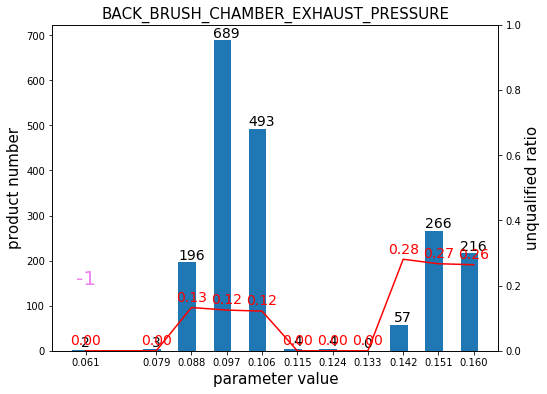

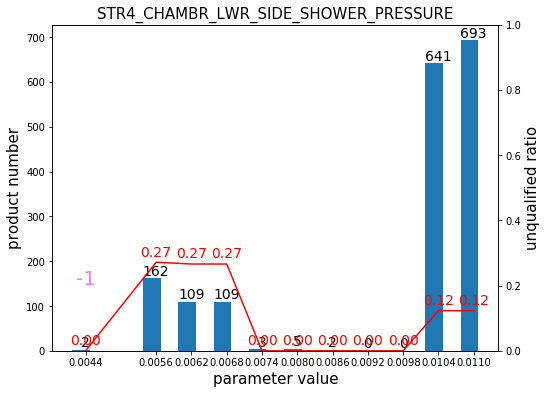

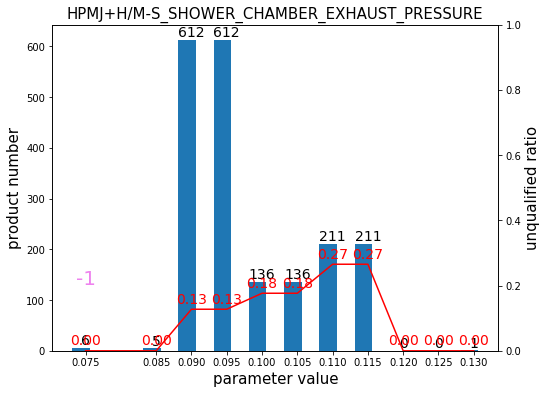

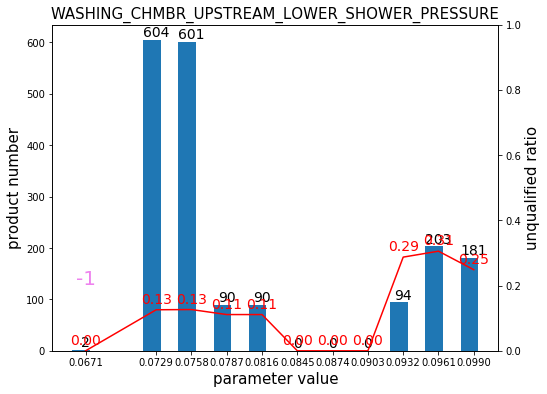

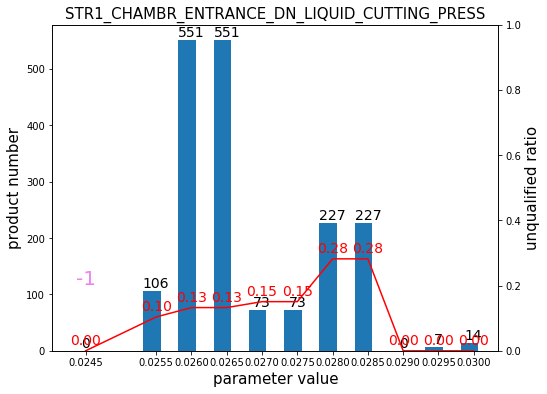

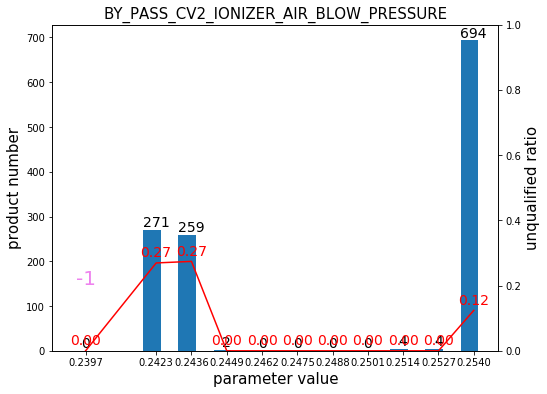

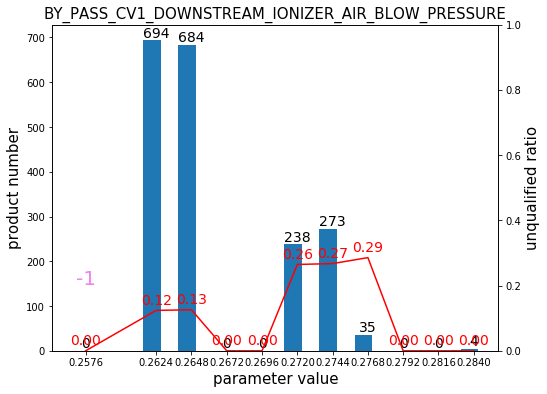

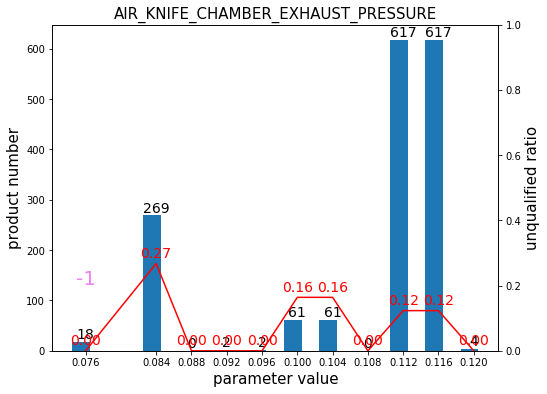

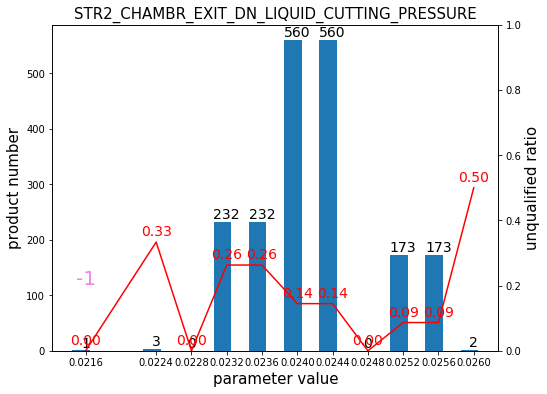

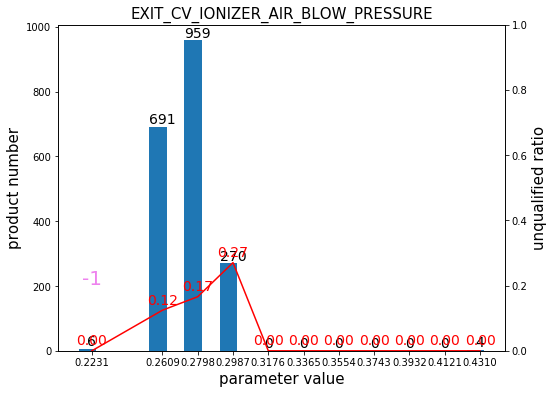

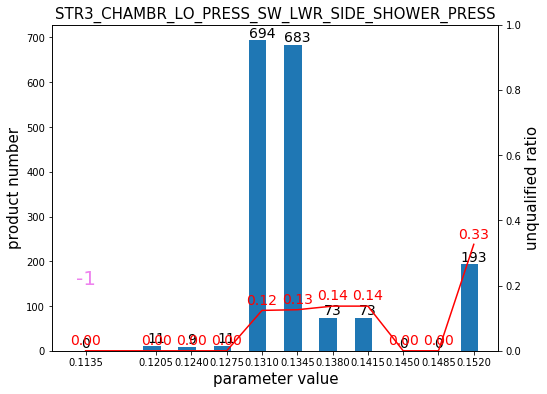

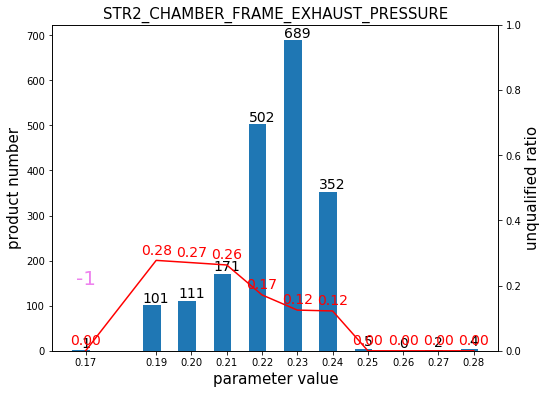

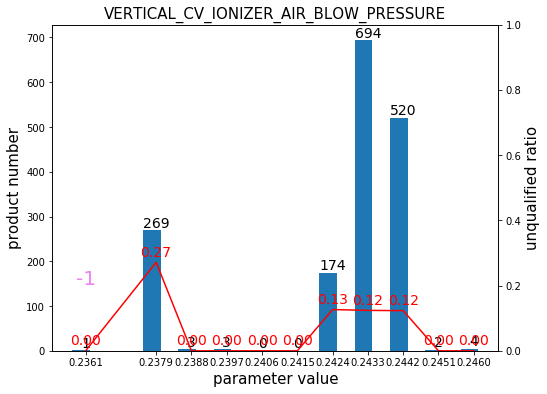

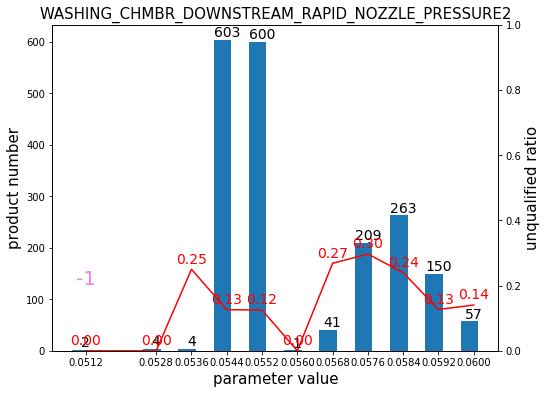

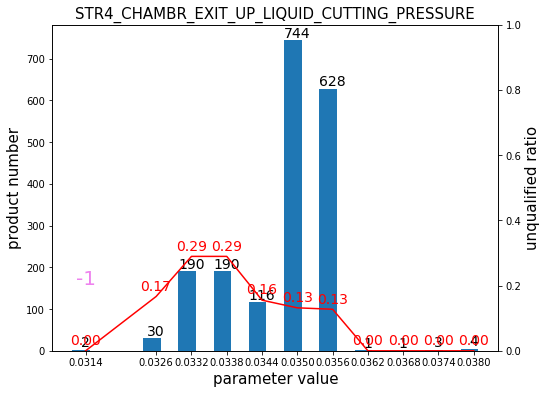

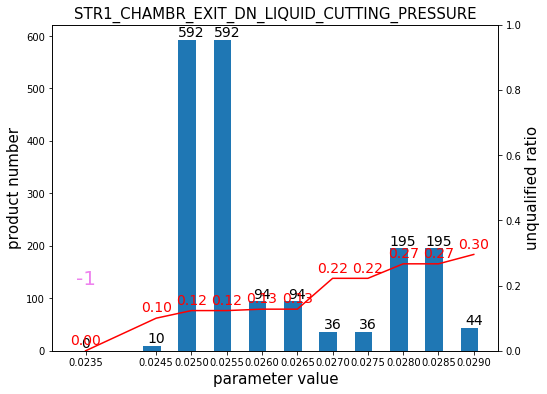

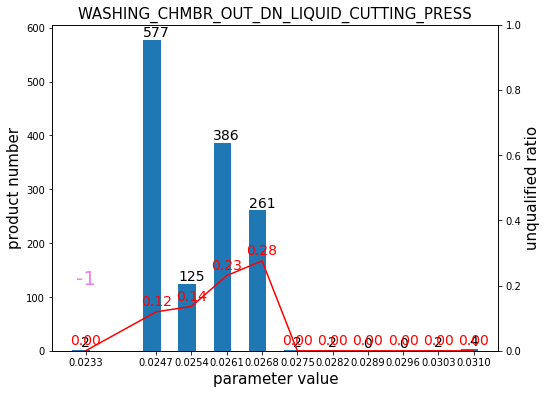

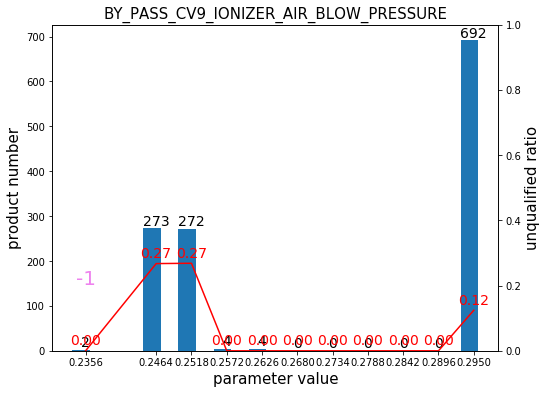

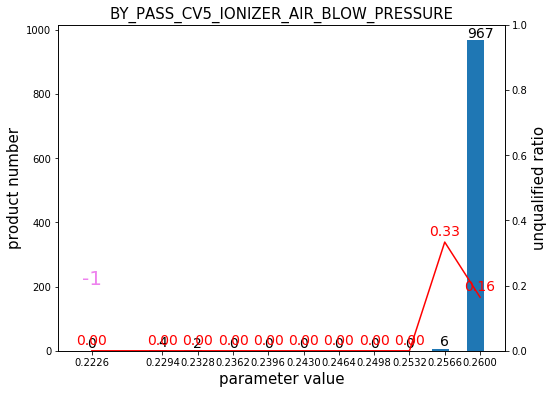

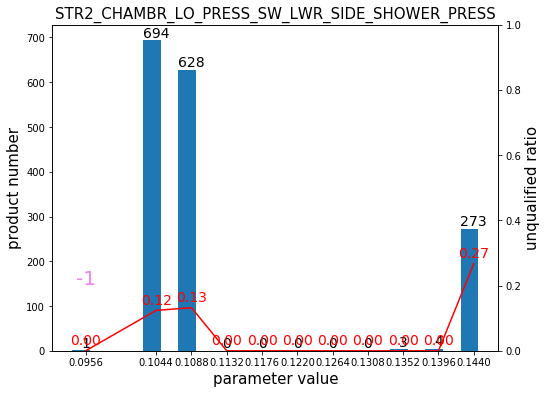

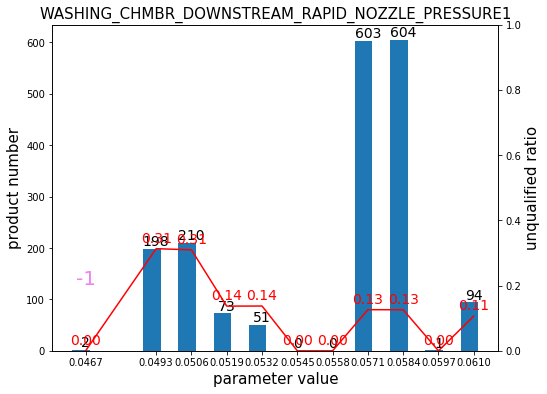

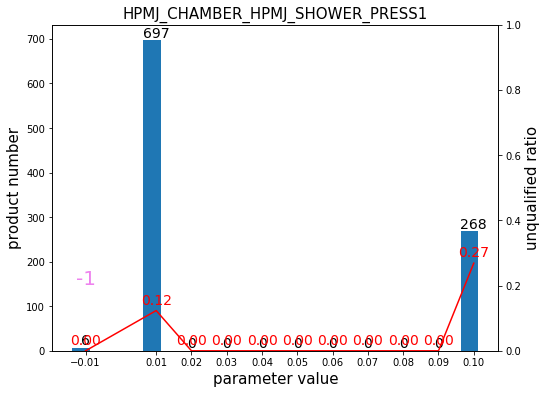

In [10]:
df_importance=Analysis_xgb_importance_plot_product_number_ratio(df_M3_STO,col_M3_STO,feature_num=20,product_ana_plot_num=20)

In [57]:
df_product_para=df_ITO2_IEX
columns_list=col_ITO2_IEX

data_array=df_product_para[columns_list].values
label_array=df_product_para['label'].values
print(data_array.shape,label_array.shape)
X_Train, X_Test, Y_Train, Y_Test =train_test_split(data_array,label_array,test_size=0.1, random_state=0)

xgb_params = {'eta': 0.005, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.8,
          'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True, 'nthread': 4}
trn_data = xgb.DMatrix(X_Train, Y_Train)
val_data = xgb.DMatrix(X_Test, Y_Test)
watchlist = [(trn_data, 'train'),(val_data,'test')]
clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=2000,
                        verbose_eval=100, params=xgb_params)

(513, 486) (513,)
[0]	train-auc:0.916898	test-auc:0.711905
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 2000 rounds.
[100]	train-auc:0.999871	test-auc:0.761905
[200]	train-auc:1	test-auc:0.766667
[300]	train-auc:1	test-auc:0.766667
[400]	train-auc:1	test-auc:0.766667
[500]	train-auc:1	test-auc:0.761905
[600]	train-auc:1	test-auc:0.766667
[700]	train-auc:1	test-auc:0.766667
[800]	train-auc:1	test-auc:0.766667
[900]	train-auc:1	test-auc:0.766667
[1000]	train-auc:1	test-auc:0.769048
[1100]	train-auc:1	test-auc:0.77381
[1200]	train-auc:1	test-auc:0.769048
[1300]	train-auc:1	test-auc:0.769048
[1400]	train-auc:1	test-auc:0.769048
[1500]	train-auc:1	test-auc:0.769048
[1600]	train-auc:1	test-auc:0.771429
[1700]	train-auc:1	test-auc:0.769048
[1800]	train-auc:1	test-auc:0.769048
[1900]	train-auc:1	test-auc:0.771429
[2000]	train-auc:1	test-auc:0.769048
[2100]	train-auc:1	test-auc:0.769048
[2200]	train-auc:1	test-

In [58]:
X_pred=xgb.DMatrix(X_Test)
y_result=clf.predict(X_pred)
y_pred=np.round(y_result)
print(confusion_matrix(Y_Test, y_pred,labels=[0,1]))

[[40  2]
 [ 7  3]]


auc 0.7666666666666667


<Figure size 432x288 with 0 Axes>

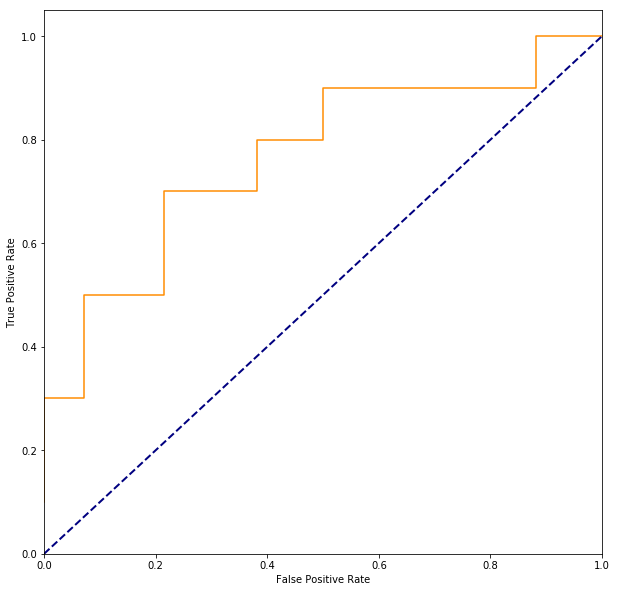

In [59]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(Y_Test, y_result,drop_intermediate=True) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("auc",roc_auc)
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

array([[23,  0],
       [ 6,  7]], dtype=int64)

In [ ]:
df_importance=Analysis_xgb_importance_plot_product_number_ratio(df_BP2_ICP,col_BP2_ICP,feature_num=20)

(513, 486) (513,)
[0]	train-auc:0.916898	validation-auc:0.711905
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 2000 rounds.
[100]	train-auc:0.999871	validation-auc:0.761905
[200]	train-auc:1	validation-auc:0.766667
[300]	train-auc:1	validation-auc:0.766667
[400]	train-auc:1	validation-auc:0.766667
[500]	train-auc:1	validation-auc:0.761905
[600]	train-auc:1	validation-auc:0.766667
[700]	train-auc:1	validation-auc:0.766667
[800]	train-auc:1	validation-auc:0.766667
[900]	train-auc:1	validation-auc:0.766667
[1000]	train-auc:1	validation-auc:0.769048
[1100]	train-auc:1	validation-auc:0.77381
[1200]	train-auc:1	validation-auc:0.769048
[1300]	train-auc:1	validation-auc:0.769048
[1400]	train-auc:1	validation-auc:0.769048
[1500]	train-auc:1	validation-auc:0.769048
[1600]	train-auc:1	validation-auc:0.771429
[1700]	train-auc:1	validation-auc:0.769048
[1800]	train-auc:1	validation-auc:0.769048
[1900]	tr

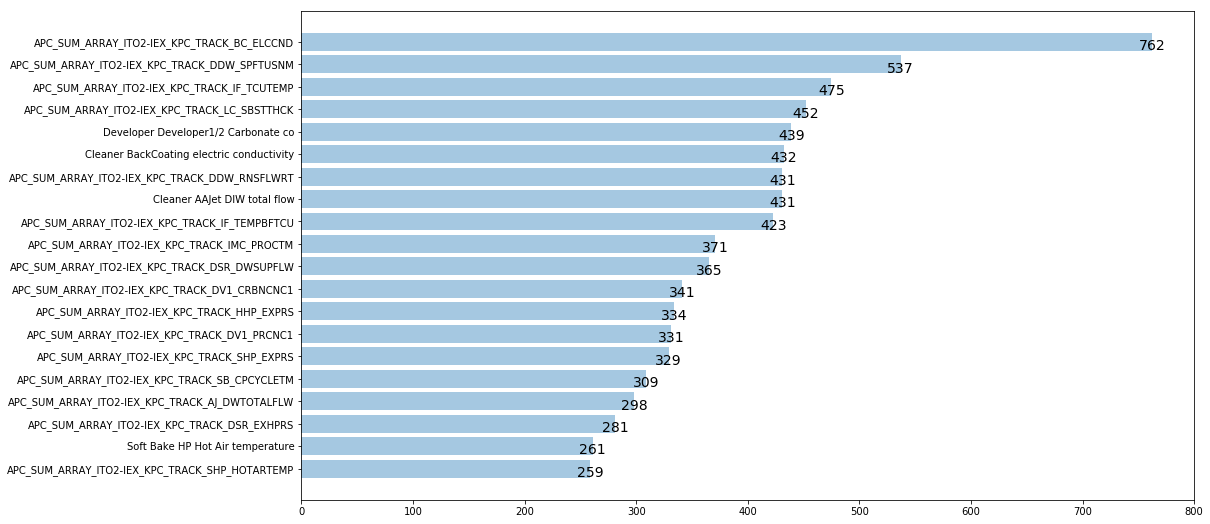

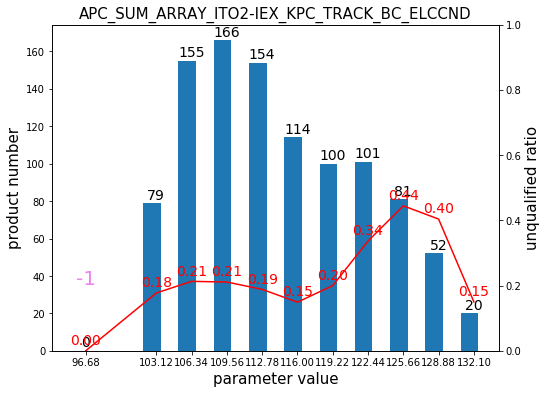

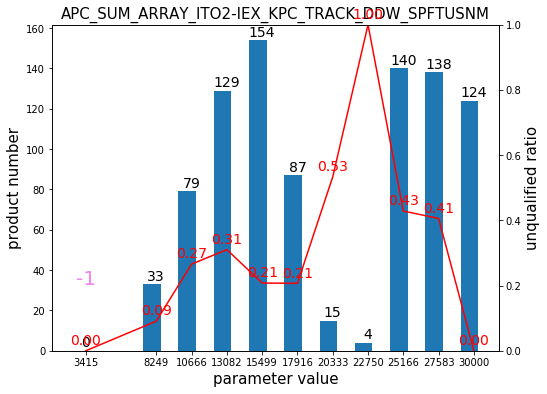

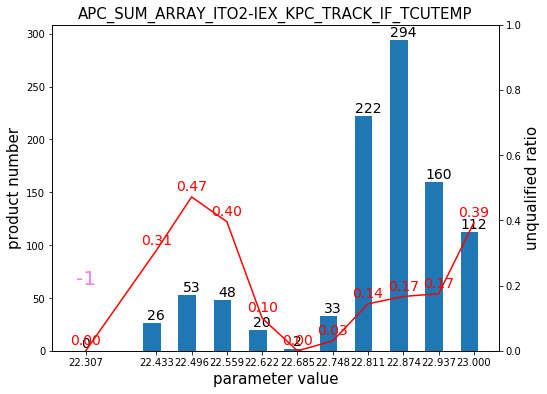

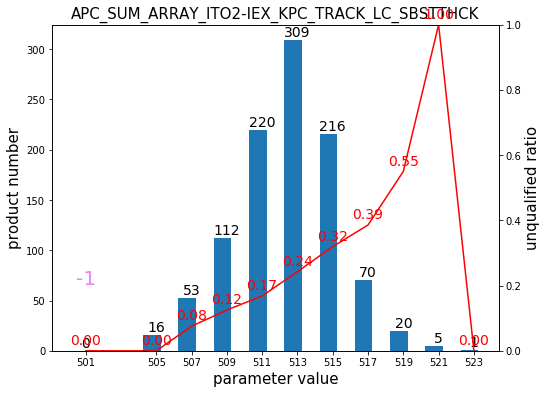

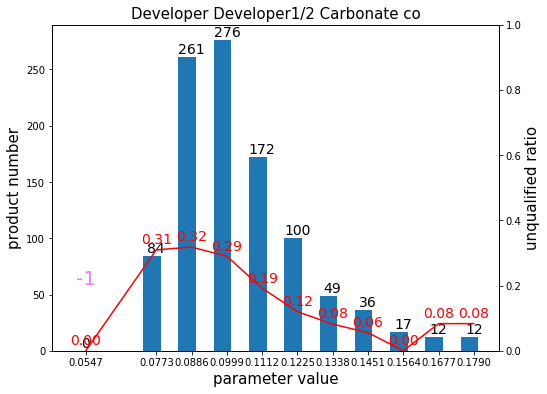

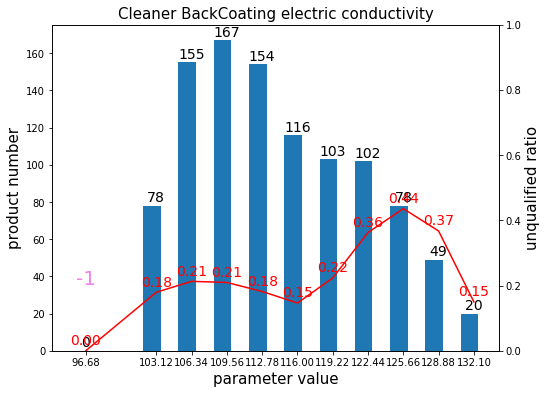

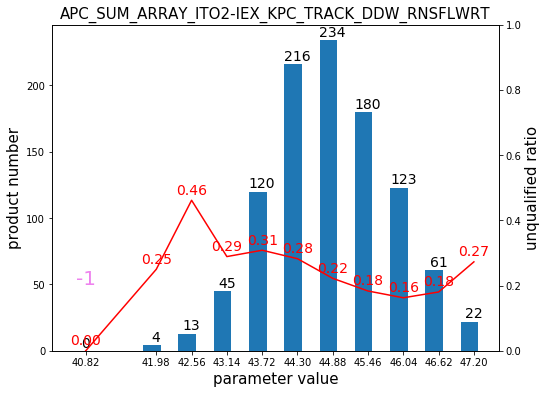

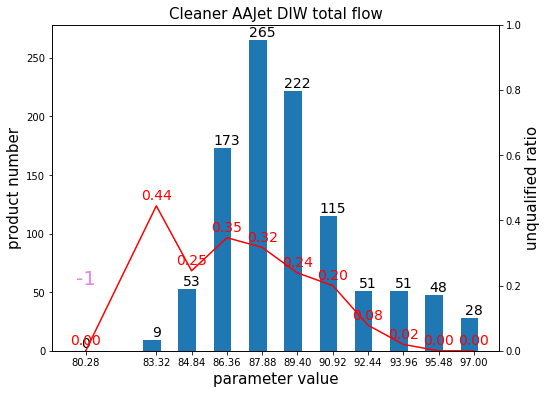

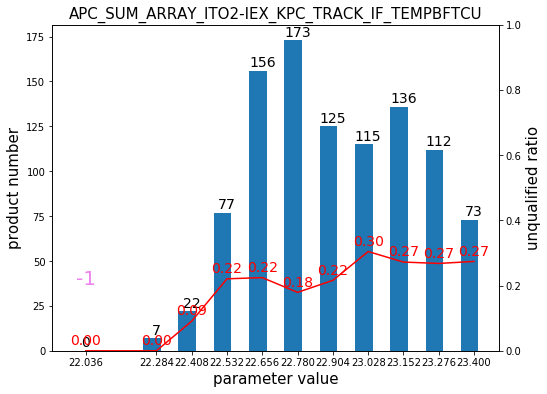

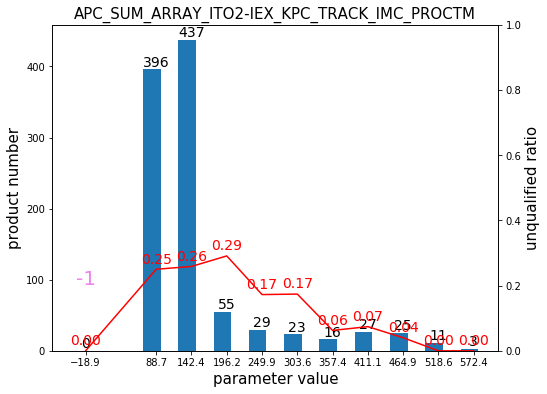

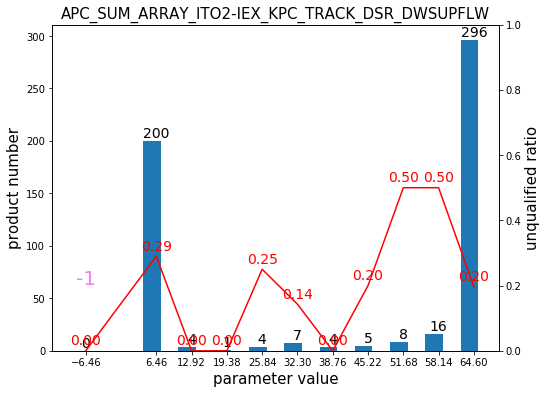

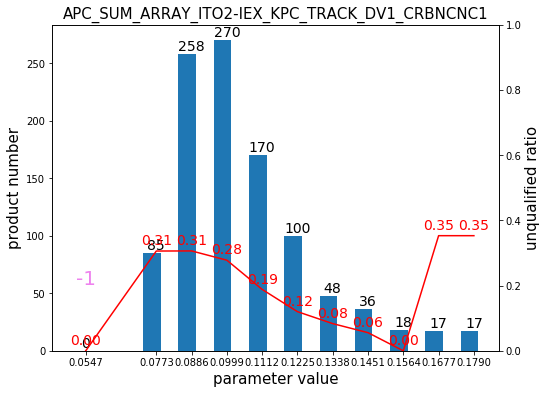

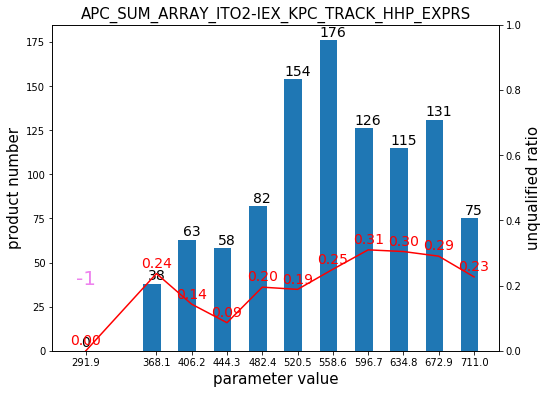

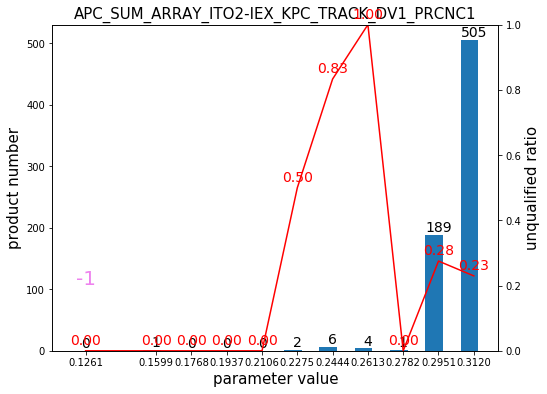

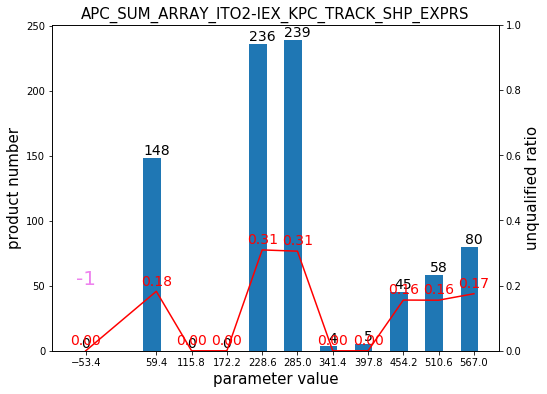

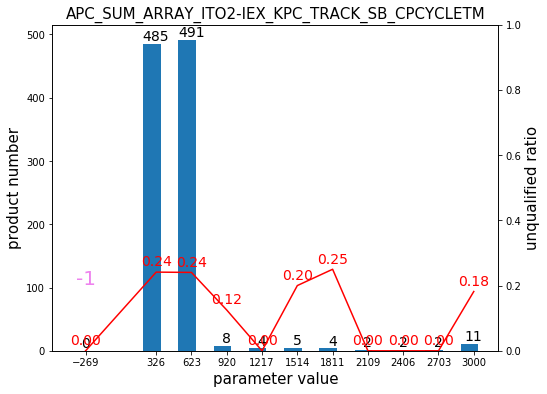

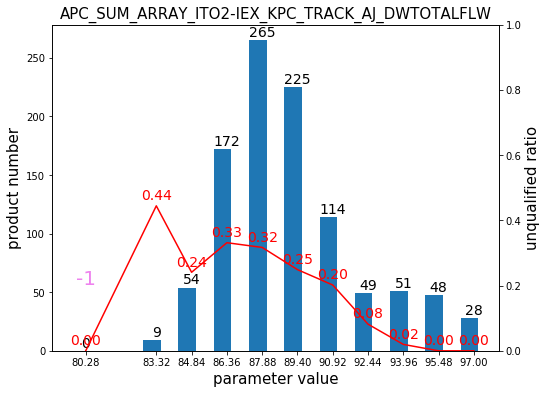

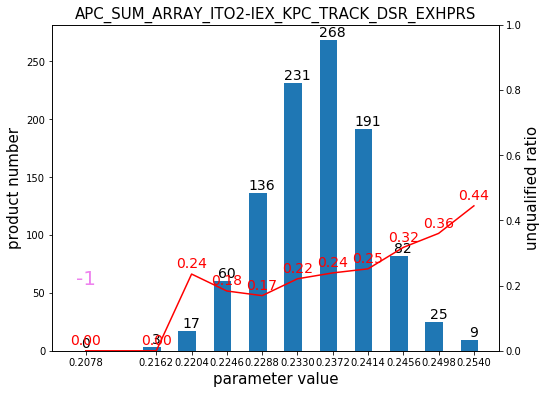

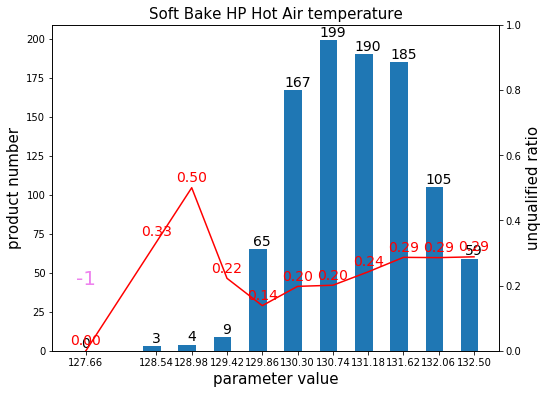

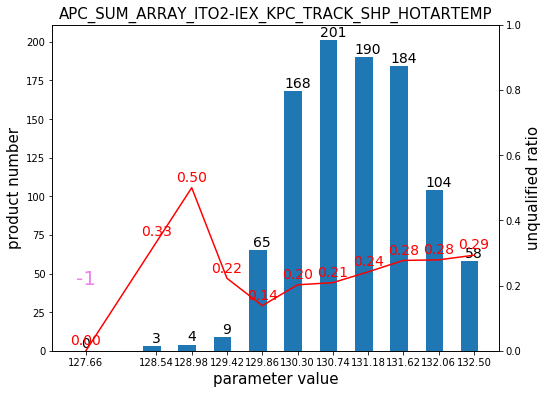

In [17]:
df_importance=Analysis_xgb_importance_plot_product_number_ratio(df_ITO2_IEX,col_ITO2_IEX,feature_num=20)

In [ ]:
# df_report=analysis_ratio_every_col(df_M3_CLA)
# df_report.to_csv(os.path.join("F:\\YIELD\\youdaOptronics\\Archive(2)\\data_generate",'M3_CLA_report.csv'),index=False)
# df_report=analysis_ratio_every_col(df_M3_STO)
# df_report.to_csv(os.path.join("F:\\YIELD\\youdaOptronics\\Archive(2)\\data_generate",'M3_STO_report.csv'),index=False)
# df_report=analysis_ratio_every_col(df_BP2_ICP)
# df_report.to_csv(os.path.join("F:\\YIELD\\youdaOptronics\\Archive(2)\\data_generate",'BP2_ICP_report.csv'),index=False)
# df_report=analysis_ratio_every_col(df_ITO2_IEX_KPC)
# df_report.to_csv(os.path.join("F:\\YIELD\\youdaOptronics\\Archive(2)\\data_generate",'ITO2_IEX_KPC_report.csv'),index=False)
# df_report=analysis_ratio_every_col(df_ITO2_IEX_RS)
# df_report.to_csv(os.path.join("F:\\YIELD\\youdaOptronics\\Archive(2)\\data_generate",'ITO2_IEX_RS_report.csv'),index=False)

In [ ]:
df_importance_